# **New York City Yellow Taxi Data**

-- Prepared by Manish Rathod

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Try loading one file
df = pd.read_parquet("/content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Datasets and Dictionary/trip_records')

# Parameters
sample_fraction = 0.05  # 5% sample per hour
# initialise an empty dataframe
final_df = pd.DataFrame()

# Create a list of all the twelve files to read
file_list = sorted([f for f in os.listdir() if f.endswith('.parquet')])

# Loop through each parquet file
for file_name in file_list:
    try:
         # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Processing: {file_path}")

         # Read the monthly file
        dataframe_1 = pd.read_parquet(file_path)

        # Ensure datetime format
        dataframe_1['tpep_pickup_datetime'] = pd.to_datetime(dataframe_1['tpep_pickup_datetime'], errors='coerce')
        # Extract date and hour for sampling
        dataframe_1['date'] = dataframe_1['tpep_pickup_datetime'].dt.date
        dataframe_1['hour'] = dataframe_1['tpep_pickup_datetime'].dt.hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        # Sample 5% per hour of each date
        hourly_samples = []
        for (dt, hr), group in dataframe_1.groupby(['date', 'hour']):
        # Loop through dates and then loop through every hour of each date
        # Iterate through each hour of the selected date
        # Sample 5% of the hourly data randomly
            if not group.empty:
                sampled = group.sample(frac=sample_fraction, random_state=42)
                hourly_samples.append(sampled)
        # Combine all hourly samples from this file
        sampled_data = pd.concat(hourly_samples, ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        final_df = pd.concat([final_df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-1.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-10.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-11.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-12.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-2.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-3.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-4.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-5.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-6.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-7.parquet
Processing: /content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-8.parquet
Processing: /content/drive/MyDrive/Datas

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
# Store the df in csv/parquet
final_df.to_parquet('trip_records_parquet')
final_df.to_csv('trip_records_in_csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
data0=pd.read_parquet('trip_records_parquet')

In [10]:
data0.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [11]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758584 entries, 0 to 758583
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               758584 non-null  int64         
 1   tpep_pickup_datetime   758584 non-null  datetime64[us]
 2   tpep_dropoff_datetime  758584 non-null  datetime64[us]
 3   passenger_count        732914 non-null  float64       
 4   trip_distance          758584 non-null  float64       
 5   RatecodeID             732914 non-null  float64       
 6   store_and_fwd_flag     732914 non-null  object        
 7   PULocationID           758584 non-null  int64         
 8   DOLocationID           758584 non-null  int64         
 9   payment_type           758584 non-null  int64         
 10  fare_amount            758584 non-null  float64       
 11  extra                  758584 non-null  float64       
 12  mta_tax                758584 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
data0 = data0.reset_index(drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns
data0['airport_fee'] = data0['airport_fee'].fillna(0) + data0['Airport_fee'].fillna(0)
data0=data0.drop(columns =['Airport_fee'])

In [14]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758584 entries, 0 to 758583
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               758584 non-null  int64         
 1   tpep_pickup_datetime   758584 non-null  datetime64[us]
 2   tpep_dropoff_datetime  758584 non-null  datetime64[us]
 3   passenger_count        732914 non-null  float64       
 4   trip_distance          758584 non-null  float64       
 5   RatecodeID             732914 non-null  float64       
 6   store_and_fwd_flag     732914 non-null  object        
 7   PULocationID           758584 non-null  int64         
 8   DOLocationID           758584 non-null  int64         
 9   payment_type           758584 non-null  int64         
 10  fare_amount            758584 non-null  float64       
 11  extra                  758584 non-null  float64       
 12  mta_tax                758584 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [15]:
# check where values of fare amount are negative
data0[data0.fare_amount<0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [16]:
# Analyse RatecodeID for the negative fare amounts
neg_cols=data0[data0.fare_amount<0]
data0.RatecodeID.unique()

array([ 1., nan,  2.,  4.,  5., 99.,  3.,  6.])

In [21]:
#data0['RatecodeID'] = data0['RatecodeID'].fillna(99)

In [18]:
# Find which columns have negative values
negative_columns = [col for col in data0.select_dtypes(include='number').columns if (data0[col] < 0).any()]
print("Negative values:", negative_columns)

Negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [19]:
# fix these negative values
data0[negative_columns] = data0[negative_columns].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [23]:
# Find the proportion of missing values in each column
100*data0.isna().sum()/data0.shape[0]

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.383936
trip_distance            0.000000
RatecodeID               3.383936
store_and_fwd_flag       3.383936
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.383936
airport_fee              0.000000
date                     0.000000
hour                     0.000000
dtype: float64

In [25]:
data0['passenger_count'].value_counts(normalize=True)*100

passenger_count
1.0    75.259580
2.0    15.115962
3.0     3.758968
4.0     2.078962
0.0     1.608784
5.0     1.306975
6.0     0.869543
8.0     0.000546
7.0     0.000409
9.0     0.000273
Name: proportion, dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [24]:
# Display the rows with null values
data0[data0.isnull().any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42             2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43             2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46             2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...          ...                  ...                   ...              ...   
758527         1  2023-09-30 23:13:14   2023-09-30 23:32:04              NaN   
758529         1  2023-09-30 23:58:33   2023-10-01 00:24:20              NaN   
758558         1  2023-09-30 23:17:50   2023-09-30 23:41:22              NaN   
758580         1  2023-09-30 23:22:20   2023-09-30 23:31:51              NaN   
758582         1  2023-09-30 23:52:42   2023-10-01 00:07:45              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
42               4.52         NaN               None           114   
43               9.19         NaN               None           239   
46               2.74         NaN               None            90   
...               ...         ...                ...           ...   
758527           0.00         NaN               None           234   
758529           0.00         NaN               None            88   
758558           0.00         NaN               None            79   
758580           0.00         NaN               None           255   
758582           0.00         NaN               None            88   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
4                107             0  ...    0.0      0.5        5.93   
15               106             0  ...    0.0      0.5       11.19   
42               262             0  ...    0.0      0.5        0.00   
43               256             0  ...    0.0      0.5        2.20   
46                48             0  ...    0.0      0.5        3.37   
...              ...           ...  ...    ...      ...         ...   
758527           211             0  ...    0.0      0.5        0.00   
758529           239             0  ...    0.0      0.5        0.00   
758558           246             0  ...    0.0      0.5        0.00   
758580            80             0  ...    0.0      0.5        0.00   
758582           107             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
758527          0.00                    1.0         20.17   
758529          0.00                    1.0         44.95   
758558          0.00                    1.0         24.44   
758580          0.00                    1.0         13.02   
758582          0.00                    1.0         31.49   

        congestion_surcharge  airport_fee        date hour  
4                        NaN          0.0  2023-01-01    0  
15                       NaN          0.0  2023-01-01    0  
42                       NaN          0.0  2023-01-01    0  
43                       NaN          0.0  2023-01-01    0  
46                       NaN          0.0  2023-01-01    0  
...                      ...          ...         ...  ...  
758527                   NaN          0.0  2023-09-30   23  
758529                   NaN          0.0  2023-09-30   23  
758558                   NaN          0.0  2023-09-30   23  
758580    

In [25]:

# Impute NaN values in 'passenger_count'
mode_value = data0['passenger_count'].mode()[0]
data0['passenger_count'] = data0['passenger_count'].fillna(mode_value)

Did you find zeroes in passenger_count? Handle these.

In [26]:
data0[data0['passenger_count'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
140            1  2023-01-01 01:25:41   2023-01-01 01:25:45              0.0   
181            1  2023-01-01 01:20:22   2023-01-01 01:30:04              0.0   
252            1  2023-01-01 02:20:58   2023-01-01 02:31:32              0.0   
269            1  2023-01-01 02:31:22   2023-01-01 02:52:37              0.0   
270            1  2023-01-01 02:19:56   2023-01-01 02:37:05              0.0   
...          ...                  ...                   ...              ...   
758074         1  2023-09-30 20:12:49   2023-09-30 20:20:22              0.0   
758105         1  2023-09-30 20:57:05   2023-09-30 21:31:44              0.0   
758117         1  2023-09-30 20:41:25   2023-09-30 21:07:34              0.0   
758402         1  2023-09-30 22:11:42   2023-09-30 22:30:33              0.0   
758475         1  2023-09-30 23:04:02   2023-09-30 23:05:11              0.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
140               0.0         1.0                  N           148   
181               1.8         1.0                  N           137   
252               1.5         1.0                  Y           158   
269               4.2         1.0                  N           141   
270               1.0         1.0                  N            48   
...               ...         ...                ...           ...   
758074            1.3         1.0                  N           163   
758105            3.7         1.0                  N           107   
758117            5.5         1.0                  N            88   
758402            3.0         1.0                  N           140   
758475            0.2         1.0                  N            50   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
140              148             1  ...    3.5      0.5        52.0   
181              161             1  ...    3.5      0.5         3.1   
252              264             1  ...    3.5      0.5         2.0   
269              179             2  ...    3.5      0.5         0.0   
270               68             1  ...    3.5      0.5         0.0   
...              ...           ...  ...    ...      ...         ...   
758074           236             1  ...    3.5      0.5         1.7   
758105           256             1  ...    3.5      0.5         0.0   
758117            34             1  ...    2.5      0.5         5.0   
758402            48             1  ...    3.5      0.5         4.4   
758475            50             1  ...    3.5      0.5         1.0   

        tolls_amount  improvement_surcharge  total_amount  \
140              0.0                    1.0          60.0   
181              0.0                    1.0          18.8   
252              0.0                    1.0          19.1   
269              0.0                    1.0          29.0   
270              0.0                    1.0          17.1   
...              ...                    ...           ...   
758074           0.0                    1.0          16.0   
758105           0.0                    1.0          31.1   
758117           0.0                    1.0          37.9   
758402           0.0                    1.0          26.4   
758475           0.0                    1.0           9.7   

        congestion_surcharge  airport_fee        date hour  
140                      2.5          0.0  2023-01-01    1  
181                      2.5          0.0  2023-01-01    1  
252                      2.5          0.0  2023-01-01    2  
269                      2.5          0.0  2023-01-01    2  
270                      2.5          0.0  2023-01-01    2  
...                      ...          ...         ...  ...  
758074                   2.5          0.0  2023-09-30   20  
758105                   2.5          0.0  2023-09-30   20  
758117                   2.5          0.0  2023-09-30   20  
758402    

In [27]:
# selecting which does not have 0 value
data0 = data0[data0['passenger_count'] != 0]
data0['passenger_count'].value_counts(normalize=True)*100

passenger_count
1.0    77.298261
2.0    14.835035
3.0     3.689108
4.0     2.040324
5.0     1.282685
6.0     0.853382
8.0     0.000536
7.0     0.000402
9.0     0.000268
Name: proportion, dtype: float64

In [28]:
data0['RatecodeID'].value_counts(normalize=True)*100

RatecodeID
1.0     94.379738
2.0      3.924435
99.0     0.589497
5.0      0.560237
3.0      0.338084
4.0      0.207732
6.0      0.000277
Name: proportion, dtype: float64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [29]:
data0[data0['RatecodeID'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
42             2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
43             2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
46             2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   
...          ...                  ...                   ...              ...   
758527         1  2023-09-30 23:13:14   2023-09-30 23:32:04              1.0   
758529         1  2023-09-30 23:58:33   2023-10-01 00:24:20              1.0   
758558         1  2023-09-30 23:17:50   2023-09-30 23:41:22              1.0   
758580         1  2023-09-30 23:22:20   2023-09-30 23:31:51              1.0   
758582         1  2023-09-30 23:52:42   2023-10-01 00:07:45              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24         NaN               None            66   
15              10.77         NaN               None           151   
42               4.52         NaN               None           114   
43               9.19         NaN               None           239   
46               2.74         NaN               None            90   
...               ...         ...                ...           ...   
758527           0.00         NaN               None           234   
758529           0.00         NaN               None            88   
758558           0.00         NaN               None            79   
758580           0.00         NaN               None           255   
758582           0.00         NaN               None            88   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
4                107             0  ...    0.0      0.5        5.93   
15               106             0  ...    0.0      0.5       11.19   
42               262             0  ...    0.0      0.5        0.00   
43               256             0  ...    0.0      0.5        2.20   
46                48             0  ...    0.0      0.5        3.37   
...              ...           ...  ...    ...      ...         ...   
758527           211             0  ...    0.0      0.5        0.00   
758529           239             0  ...    0.0      0.5        0.00   
758558           246             0  ...    0.0      0.5        0.00   
758580            80             0  ...    0.0      0.5        0.00   
758582           107             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
758527          0.00                    1.0         20.17   
758529          0.00                    1.0         44.95   
758558          0.00                    1.0         24.44   
758580          0.00                    1.0         13.02   
758582          0.00                    1.0         31.49   

        congestion_surcharge  airport_fee        date hour  
4                        NaN          0.0  2023-01-01    0  
15                       NaN          0.0  2023-01-01    0  
42                       NaN          0.0  2023-01-01    0  
43                       NaN          0.0  2023-01-01    0  
46                       NaN          0.0  2023-01-01    0  
...                      ...          ...         ...  ...  
758527                   NaN          0.0  2023-09-30   23  
758529                   NaN          0.0  2023-09-30   23  
758558                   NaN          0.0  2023-09-30   23  
758580    

In [30]:
data0['RatecodeID']= data0['RatecodeID'].fillna(99)
data0['RatecodeID'].value_counts(normalize=True)

RatecodeID
1.0     0.911356
99.0    0.040066
2.0     0.037895
5.0     0.005410
3.0     0.003265
4.0     0.002006
6.0     0.000003
Name: proportion, dtype: float64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [31]:
# handle null values in congestion_surcharge
data0['congestion_surcharge'].value_counts(normalize=True)
data0[data0['congestion_surcharge'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
42             2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
43             2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
46             2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   
...          ...                  ...                   ...              ...   
758527         1  2023-09-30 23:13:14   2023-09-30 23:32:04              1.0   
758529         1  2023-09-30 23:58:33   2023-10-01 00:24:20              1.0   
758558         1  2023-09-30 23:17:50   2023-09-30 23:41:22              1.0   
758580         1  2023-09-30 23:22:20   2023-09-30 23:31:51              1.0   
758582         1  2023-09-30 23:52:42   2023-10-01 00:07:45              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24        99.0               None            66   
15              10.77        99.0               None           151   
42               4.52        99.0               None           114   
43               9.19        99.0               None           239   
46               2.74        99.0               None            90   
...               ...         ...                ...           ...   
758527           0.00        99.0               None           234   
758529           0.00        99.0               None            88   
758558           0.00        99.0               None            79   
758580           0.00        99.0               None           255   
758582           0.00        99.0               None            88   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
4                107             0  ...    0.0      0.5        5.93   
15               106             0  ...    0.0      0.5       11.19   
42               262             0  ...    0.0      0.5        0.00   
43               256             0  ...    0.0      0.5        2.20   
46                48             0  ...    0.0      0.5        3.37   
...              ...           ...  ...    ...      ...         ...   
758527           211             0  ...    0.0      0.5        0.00   
758529           239             0  ...    0.0      0.5        0.00   
758558           246             0  ...    0.0      0.5        0.00   
758580            80             0  ...    0.0      0.5        0.00   
758582           107             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
758527          0.00                    1.0         20.17   
758529          0.00                    1.0         44.95   
758558          0.00                    1.0         24.44   
758580          0.00                    1.0         13.02   
758582          0.00                    1.0         31.49   

        congestion_surcharge  airport_fee        date hour  
4                        NaN          0.0  2023-01-01    0  
15                       NaN          0.0  2023-01-01    0  
42                       NaN          0.0  2023-01-01    0  
43                       NaN          0.0  2023-01-01    0  
46                       NaN          0.0  2023-01-01    0  
...                      ...          ...         ...  ...  
758527                   NaN          0.0  2023-09-30   23  
758529                   NaN          0.0  2023-09-30   23  
758558                   NaN          0.0  2023-09-30   23  
758580    

In [32]:
data0['congestion_surcharge']= data0['congestion_surcharge'].fillna(2.5) # filled with 2.5 as it is mode

In [33]:
data0['congestion_surcharge'].value_counts(normalize=True)

congestion_surcharge
2.5    0.925560
0.0    0.074438
0.5    0.000001
Name: proportion, dtype: float64

In [34]:
data0[data0['congestion_surcharge'].isnull()] # check for nulls

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [36]:
# Handle any remaining missing values

missing_value_columns = data0.columns[data0.isnull().any()].tolist()
missing_value_columns

['store_and_fwd_flag']

In [37]:
#Fixing store_and_fwd_flag
data0['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994306
Y    0.005694
Name: proportion, dtype: float64

In [38]:
# handle missing value for store_and_fwd_flag
data0['store_and_fwd_flag']= data0['store_and_fwd_flag'].fillna('N')

In [39]:
data0['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994502
Y    0.005498
Name: proportion, dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [41]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
data0.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  746793.000000                      746793                      746793   
mean        1.745236  2023-07-02 23:57:22.182735  2023-07-03 00:14:48.055717   
min         1.000000         2023-01-01 00:02:19         2023-01-01 00:09:40   
25%         1.000000         2023-04-02 18:20:14         2023-04-02 18:39:16   
50%         2.000000         2023-06-27 19:21:43         2023-06-27 19:35:07   
75%         2.000000         2023-10-06 23:38:13         2023-10-06 23:53:46   
max         6.000000         2023-12-31 23:57:51         2024-01-01 20:14:57   
std         0.441347                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    746793.000000  746793.000000  746793.000000  746793.000000   
mean          1.377402       3.720022       4.998562     165.264528   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   34804.510000      99.000000     265.000000   
std           0.869636      73.480890      19.208368      63.979667   

        DOLocationID   payment_type    fare_amount          extra  \
count  746793.000000  746793.000000  746793.000000  746793.000000   
mean      163.963282       1.162848      20.059165       1.558613   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.829483       0.506999     166.636447       1.817913   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  746793.000000  746793.000000  746793.000000          746793.000000   
mean        0.495309       3.549454       0.597051               0.999058   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.450000       0.000000               1.000000   
max         4.000000     180.000000     143.000000               1.000000   
std         0.048584       4.030424       2.189924               0.028257   

        total_amount  congestion_surcharge    airport_fee           hour  
count  746793.000000         746793.000000  746793.000000  746793.000000  
mean       29.124870              2.313902       0.138518      14.268443  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000       0.000000      11.000000  
50%        21.000000              2.500000       0.000000      15.000000  
75%        31.000000              2.500000       0.000000      19.000000  
max    143167.450000              2.500000       1.750000      23.000000  
std       167.190178              0.656211       0.458282       5.814413

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [42]:
# remove passenger_count > 6
data0 = data0[data0['passenger_count'] <= 6]
data0['passenger_count'].value_counts(normalize=True)

passenger_count
1.0    0.772992
2.0    0.148352
3.0    0.036892
4.0    0.020403
5.0    0.012827
6.0    0.008534
Name: proportion, dtype: float64

In [40]:
# Continue with outlier handling
# Entries where trip_distance is almost 0 and fare_amount is greater than 300
outlier_data0=data0[(data0['trip_distance'] < 0.01) & (data0['fare_amount'] > 300)]
outlier_data0
data0=data0[~((data0['trip_distance'] < 0.01) & (data0['fare_amount'] > 300))]

In [41]:
# after dropping check
outlier_data0=data0[(data0['trip_distance'] < 0.01) & (data0['fare_amount'] > 300)]
outlier_data0

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]

In [42]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
outlier_data1=data0[(data0['trip_distance'] == 0) & (data0['fare_amount'] == 0) & (data0['PULocationID']!= data0['DOLocationID'])]
outlier_data1

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
33372          1  2023-01-18 16:23:49   2023-01-18 16:23:49              1.0   
98020          1  2023-10-17 21:13:10   2023-10-17 21:13:10              1.0   
114151         1  2023-10-24 21:22:17   2023-10-24 21:22:17              1.0   
144856         1  2023-11-07 08:42:41   2023-11-07 08:42:41              1.0   
146909         1  2023-11-08 04:38:05   2023-11-08 04:41:18              1.0   
147995         1  2023-11-08 15:29:15   2023-11-08 15:29:47              1.0   
169005         1  2023-11-17 10:27:38   2023-11-17 10:27:38              1.0   
169359         1  2023-11-17 13:28:12   2023-11-17 13:52:16              1.0   
203555         1  2023-12-03 21:22:01   2023-12-03 21:22:01              1.0   
216440         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
239062         1  2023-12-18 09:31:12   2023-12-18 09:31:12              1.0   
244003         1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
256482         1  2023-12-27 20:51:43   2023-12-27 21:00:02              3.0   
343310         1  2023-06-06 16:55:01   2023-06-06 16:55:01              1.0   
392104         1  2023-06-28 21:29:09   2023-06-28 21:32:08              1.0   
452392         1  2023-02-01 08:20:36   2023-02-01 08:20:36              6.0   
453305         2  2023-02-01 16:53:34   2023-02-01 16:54:13              1.0   
457531         1  2023-02-03 14:44:55   2023-02-03 14:44:55              1.0   
569433         2  2023-04-28 13:52:30   2023-04-28 14:43:03              1.0   
578481         1  2023-05-02 17:42:04   2023-05-02 17:42:04              1.0   
617863         2  2023-05-19 10:55:37   2023-05-19 10:55:44              1.0   
682291         1  2023-07-21 18:45:23   2023-07-21 18:46:05              1.0   
737790         1  2023-09-17 20:40:48   2023-09-17 20:40:48              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
33372             0.0         1.0                  N           239   
98020             0.0         1.0                  Y           132   
114151            0.0         1.0                  N           161   
144856            0.0         1.0                  N           237   
146909            0.0         1.0                  N           233   
147995            0.0         1.0                  N           164   
169005            0.0         1.0                  N           261   
169359            0.0        99.0                  N            74   
203555            0.0         5.0                  Y           186   
216440            0.0         2.0                  N           107   
239062            0.0         5.0                  Y           138   
244003            0.0         5.0                  Y           138   
256482            0.0         5.0                  N           132   
343310            0.0         1.0                  N           262   
392104            0.0         1.0                  N           246   
452392            0.0        99.0                  Y           145   
453305            0.0         1.0                  N           193   
457531            0.0         1.0                  Y           237   
569433            0.0         1.0                  N           264   
578481            0.0         5.0                  N            75   
617863            0.0         1.0                  N             7   
682291            0.0         1.0                  N            56   
737790            0.0         5.0                  N            79   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
33372            264             2  ...   0.00      0.0         0.0   
98020            264             2  ...   4.50      0.0         0.0   
114151           264             3  ...   0.00      0.0         0.0   
144856           264             2  ...   0.00      0.0         0.0   
146909           107             3  ...   0.00     

In [43]:
data0=data0[~((data0['trip_distance'] == 0) & (data0['fare_amount'] == 0) & (data0['PULocationID']!= data0['DOLocationID']))]

In [44]:
outlier_data1=data0[(data0['trip_distance'] == 0) & (data0['fare_amount'] == 0) & (data0['PULocationID']!= data0['DOLocationID'])]
outlier_data1# only 23 rows

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]

In [45]:
#Entries where `trip_distance` is more than 250  miles
data0['trip_distance'].value_counts(normalize=True)

trip_distance
0.00     0.019676
0.90     0.013177
1.00     0.013095
1.10     0.012853
0.80     0.012850
           ...   
47.19    0.000001
26.08    0.000001
50.19    0.000001
29.46    0.000001
29.36    0.000001
Name: proportion, Length: 3460, dtype: float64

In [46]:
outlier_data2=data0[(data0['trip_distance']>250)]
data0=data0[(data0['trip_distance']<=250)]

In [47]:
#Entries where payment_type is 0 however there is no payment_type 0 defined in the data dictionary
data0['payment_type'].value_counts(normalize=True)
outlier_data3=data0[(data0['payment_type']==0)]
outlier_data3

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4              2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15             2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
42             2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
43             2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
46             2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   
...          ...                  ...                   ...              ...   
758527         1  2023-09-30 23:13:14   2023-09-30 23:32:04              1.0   
758529         1  2023-09-30 23:58:33   2023-10-01 00:24:20              1.0   
758558         1  2023-09-30 23:17:50   2023-09-30 23:41:22              1.0   
758580         1  2023-09-30 23:22:20   2023-09-30 23:31:51              1.0   
758582         1  2023-09-30 23:52:42   2023-10-01 00:07:45              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4               19.24        99.0                  N            66   
15              10.77        99.0                  N           151   
42               4.52        99.0                  N           114   
43               9.19        99.0                  N           239   
46               2.74        99.0                  N            90   
...               ...         ...                ...           ...   
758527           0.00        99.0                  N           234   
758529           0.00        99.0                  N            88   
758558           0.00        99.0                  N            79   
758580           0.00        99.0                  N           255   
758582           0.00        99.0                  N            88   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
4                107             0  ...    0.0      0.5        5.93   
15               106             0  ...    0.0      0.5       11.19   
42               262             0  ...    0.0      0.5        0.00   
43               256             0  ...    0.0      0.5        2.20   
46                48             0  ...    0.0      0.5        3.37   
...              ...           ...  ...    ...      ...         ...   
758527           211             0  ...    0.0      0.5        0.00   
758529           239             0  ...    0.0      0.5        0.00   
758558           246             0  ...    0.0      0.5        0.00   
758580            80             0  ...    0.0      0.5        0.00   
758582           107             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
4               0.00                    1.0         35.57   
15              6.55                    1.0         67.12   
42              0.00                    1.0         29.38   
43              0.00                    1.0         46.20   
46              0.00                    1.0         25.85   
...              ...                    ...           ...   
758527          0.00                    1.0         20.17   
758529          0.00                    1.0         44.95   
758558          0.00                    1.0         24.44   
758580          0.00                    1.0         13.02   
758582          0.00                    1.0         31.49   

        congestion_surcharge  airport_fee        date hour  
4                        2.5          0.0  2023-01-01    0  
15                       2.5          0.0  2023-01-01    0  
42                       2.5          0.0  2023-01-01    0  
43                       2.5          0.0  2023-01-01    0  
46                       2.5          0.0  2023-01-01    0  
...                      ...          ...         ...  ...  
758527                   2.5          0.0  2023-09-30   23  
758529                   2.5          0.0  2023-09-30   23  
758558                   2.5          0.0  2023-09-30   23  
758580    

In [48]:
# There are hight number of  payment_type 0 hence it is filled with most filled value
data0['payment_type'].value_counts(normalize=True)
data0.loc[outlier_data3.index, 'payment_type'] = 1

In [49]:
# Do any columns need standardising?
data0.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  746741.000000                      746741                      746741   
mean        1.745248  2023-07-02 23:56:43.041197  2023-07-03 00:14:08.954284   
min         1.000000         2023-01-01 00:02:19         2023-01-01 00:09:40   
25%         1.000000         2023-04-02 18:19:47         2023-04-02 18:39:02   
50%         2.000000         2023-06-27 19:21:43         2023-06-27 19:35:07   
75%         2.000000         2023-10-06 23:36:35         2023-10-06 23:52:58   
max         6.000000         2023-12-31 23:57:51         2024-01-01 20:14:57   
std         0.441341                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID   PULocationID  \
count    746741.000000  746741.000000  746741.00000  746741.000000   
mean          1.377400       3.449730       4.99715     165.263414   
min           1.000000       0.000000       1.00000       1.000000   
25%           1.000000       1.050000       1.00000     132.000000   
50%           1.000000       1.800000       1.00000     162.000000   
75%           1.000000       3.400000       1.00000     234.000000   
max           9.000000     187.350000      99.00000     265.000000   
std           0.869626       4.527302      19.20533      63.978501   

        DOLocationID   payment_type    fare_amount          extra  \
count  746741.000000  746741.000000  746741.000000  746741.000000   
mean      163.960591       1.197186      20.051492       1.558691   
min         1.000000       1.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      14.250000   
std        69.827929       0.458513     166.630667       1.817904   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  746741.000000  746741.000000  746741.000000          746741.000000   
mean        0.495332       3.549149       0.597043               0.999082   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.450000       0.000000               1.000000   
max         4.000000     180.000000     143.000000               1.000000   
std         0.048467       4.026287       2.189805               0.027829   

        total_amount  congestion_surcharge    airport_fee           hour  
count  746741.000000         746741.000000  746741.000000  746741.000000  
mean       29.117086              2.314009       0.138514      14.268406  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000       0.000000      11.000000  
50%        21.000000              2.500000       0.000000      15.000000  
75%        31.000000              2.500000       0.000000      19.000000  
max    143167.450000              2.500000       1.750000      23.000000  
std       167.183672              0.656036       0.458276       5.814432

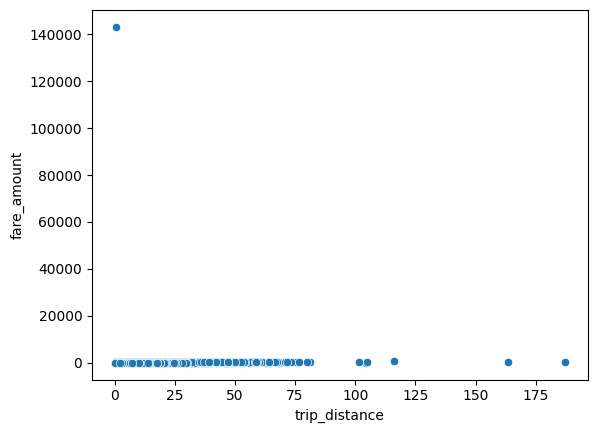

In [50]:
sns.scatterplot(data= data0, x='trip_distance',y='fare_amount')
plt.show()

In [52]:
# Based on the above date only one point is very high. This is an outlier
data0[data0['fare_amount'] > 140000]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
708995         1  2023-09-05 10:16:13   2023-09-05 10:20:56              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
708995            0.7         1.0                  N           249   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
708995            90             2  ...    2.5      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
708995           0.0                    1.0     143167.45   

        congestion_surcharge  airport_fee        date hour  
708995                   2.5          0.0  2023-09-05   10  

[1 rows x 21 columns]

In [53]:
#Dropping this row
data0 = data0[data0['fare_amount'] != 143163.45]

In [54]:
data0.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  746740.000000                      746740                      746740   
mean        1.745249  2023-07-02 23:56:35.586434  2023-07-03 00:14:01.500542   
min         1.000000         2023-01-01 00:02:19         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 18:19:44.750000  2023-04-02 18:38:59.500000   
50%         2.000000         2023-06-27 19:21:42  2023-06-27 19:34:49.500000   
75%         2.000000  2023-10-06 23:36:45.750000  2023-10-06 23:52:59.750000   
max         6.000000         2023-12-31 23:57:51         2024-01-01 20:14:57   
std         0.441340                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    746740.000000  746740.000000  746740.000000  746740.000000   
mean          1.377400       3.449733       4.997156     165.263302   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000     187.350000      99.000000     265.000000   
std           0.869626       4.527304      19.205342      63.978470   

        DOLocationID   payment_type    fare_amount          extra  \
count  746740.000000  746740.000000  746740.000000  746740.000000   
mean      163.960690       1.197185      19.859801       1.558690   
min         1.000000       1.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     700.000000      14.250000   
std        69.827924       0.458512      18.067375       1.817905   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  746740.000000  746740.000000  746740.000000          746740.000000   
mean        0.495332       3.549154       0.597044               0.999082   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.450000       0.000000               1.000000   
max         4.000000     180.000000     143.000000               1.000000   
std         0.048467       4.026287       2.189807               0.027829   

        total_amount  congestion_surcharge    airport_fee           hour  
count  746740.000000         746740.000000  746740.000000  746740.000000  
mean       28.925402              2.314009       0.138514      14.268412  
min         0.000000              0.000000       0.000000       0.000000  
25%        15.960000              2.500000       0.000000      11.000000  
50%        21.000000              2.500000       0.000000      15.000000  
75%        31.000000              2.500000       0.000000      19.000000  
max       756.440000              2.500000       1.750000      23.000000  
std        22.648911              0.656037       0.458276       5.814434

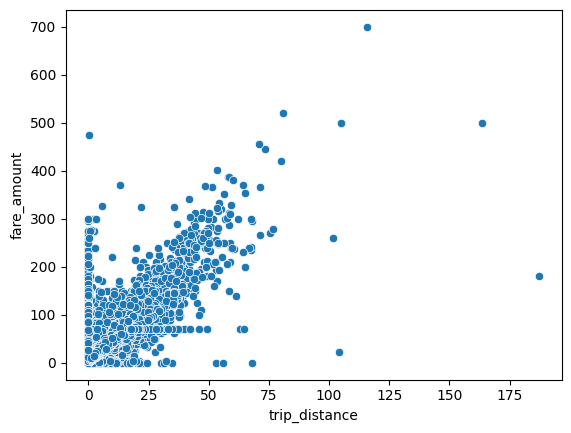

In [55]:
sns.scatterplot(data= data0, x='trip_distance',y='fare_amount')
plt.show()

In [59]:
# Checking distribution of mta_tax
data0['mta_tax'].value_counts(normalize=True)

mta_tax
0.50    0.990619
0.00    0.009350
0.80    0.000019
0.05    0.000009
3.50    0.000001
4.00    0.000001
Name: proportion, dtype: float64

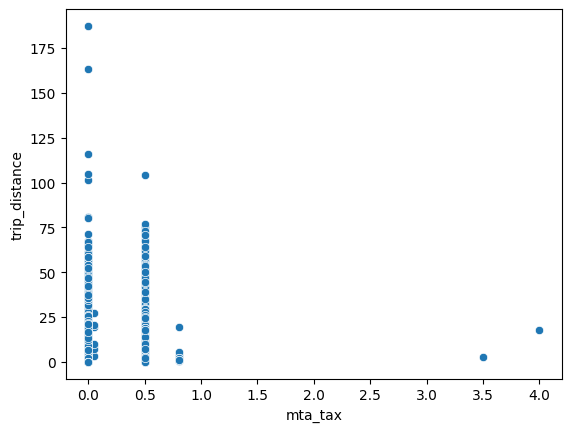

In [60]:
sns.scatterplot(data= data0, x='mta_tax',y='trip_distance')
plt.show()

In [56]:
data0[data0['mta_tax'] == 0.8]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2455           1  2023-01-02 18:16:21   2023-01-02 18:33:10              3.0   
8523           1  2023-01-06 06:47:16   2023-01-06 07:18:00              1.0   
8762           1  2023-01-06 09:15:59   2023-01-06 09:27:39              1.0   
23024          1  2023-01-13 13:43:51   2023-01-13 13:54:32              1.0   
28214          1  2023-01-15 20:39:57   2023-01-15 20:58:17              1.0   
42622          1  2023-01-22 22:46:01   2023-01-22 23:08:56              2.0   
264816         1  2023-03-01 18:11:55   2023-03-01 18:22:32              2.0   
311642         1  2023-03-23 09:25:02   2023-03-23 09:42:09              1.0   
312306         1  2023-03-23 14:41:03   2023-03-23 14:49:45              1.0   
453843         1  2023-02-01 19:06:35   2023-02-01 19:21:51              1.0   
477040         1  2023-02-12 22:23:52   2023-02-12 22:31:17              1.0   
477878         1  2023-02-13 13:46:33   2023-02-13 13:51:07              2.0   
499203         1  2023-02-23 19:14:06   2023-02-23 19:21:18              2.0   
502244         1  2023-02-25 01:44:42   2023-02-25 01:46:47              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2455              1.6         1.0                  N            68   
8523             19.4         2.0                  Y           236   
8762              1.9         1.0                  Y           142   
23024             1.5         1.0                  N           142   
28214             3.8         1.0                  N           186   
42622             5.7         1.0                  N           239   
264816            1.2         1.0                  N           249   
311642            1.5         1.0                  Y           186   
312306            1.6         1.0                  N           140   
453843            2.0         1.0                  N           236   
477040            2.2         1.0                  N           229   
477878            0.4         1.0                  N            48   
499203            0.8         1.0                  N            79   
502244            0.8         1.0                  N           237   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
2455              48             1  ...    5.0      0.8        4.25   
8523             132             1  ...    2.5      0.8       10.00   
8762             162             1  ...    2.5      0.8        3.05   
23024            237             2  ...    2.5      0.8        0.00   
28214              4             1  ...    3.5      0.8        5.20   
42622            244             1  ...    3.5      0.8        3.00   
264816           211             1  ...    5.0      0.8        3.00   
311642            50             1  ...    2.5      0.8        3.75   
312306           162             1  ...    2.5      0.8        2.80   
453843           143             1  ...    5.0      0.8        2.50   
477040           145             1  ...    3.5      0.8        3.25   
477878           230             1  ...    3.5      0.8        2.00   
499203           113             1  ...    3.5      0.8        2.30   
502244           236             1  ...    3.5      0.8        2.00   

        tolls_amount  improvement_surcharge  total_amount  \
2455            0.00                    0.3         25.65   
8523            6.55                    0.3         89.85   
8762            0.00                    0.3         18.45   
23024           0.00                    0.3         14.00   
28214           0.00                    0.3         31.40   
42622           0.00                    0.3         34.80   
264816          0.00                    0.3         18.10   
311642          0.00                    0.3         22.65   
312306          0.00                    0.3         16.80   
453843          0.00                    0.3         23.90   
477040          0.0

In [57]:
data0[data0['mta_tax'] == 0.05]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
62841          2  2023-10-01 23:44:41   2023-10-02 00:03:26              1.0   
79730          2  2023-10-09 19:25:37   2023-10-09 19:52:02              1.0   
392275         2  2023-06-28 23:33:14   2023-06-29 00:23:12              1.0   
439702         2  2023-08-24 20:33:39   2023-08-24 20:51:44              1.0   
581225         2  2023-05-03 20:39:59   2023-05-03 21:16:20              1.0   
597207         2  2023-05-10 20:11:09   2023-05-10 20:40:35              1.0   
735575         2  2023-09-16 19:38:50   2023-09-16 20:39:15              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
62841            9.45         1.0                  N           132   
79730            3.28         1.0                  N            75   
392275          27.12         1.0                  N           132   
439702           7.30         1.0                  N           138   
581225          19.22         1.0                  N           132   
597207           9.72         1.0                  N           138   
735575          20.77         1.0                  N           132   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
62841            196             2  ...    1.0     0.05        0.00   
79730            143             2  ...    0.0     0.05        0.00   
392275            25             2  ...    1.0     0.05        0.00   
439702            75             2  ...    1.0     0.05        0.00   
581225            25             1  ...    1.0     0.05       15.01   
597207            65             1  ...    1.0     0.05        7.00   
735575            40             2  ...    0.0     0.05        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
62841           0.00                    1.0         41.10   
79730           0.00                    1.0         26.85   
392275          0.00                    1.0        110.40   
439702          6.94                    1.0         40.34   
581225          0.00                    1.0         91.81   
597207          0.00                    1.0         51.60   
735575          0.00                    1.0         82.80   

        congestion_surcharge  airport_fee        date hour  
62841                    0.0         1.75  2023-10-01   23  
79730                    2.5         0.00  2023-10-09   19  
392275                   0.0         1.75  2023-06-28   23  
439702                   0.0         1.75  2023-08-24   20  
581225                   0.0         1.75  2023-05-03   20  
597207                   0.0         1.75  2023-05-10   20  
735575                   0.0         1.75  2023-09-16   19  

[7 rows x 21 columns]

In [58]:
# mta_tax will always have 0.0 or 0.5 value as it is fixed
# changing all other values as 0.5
data0['mta_tax'] = data0['mta_tax'].replace([0.80, 0.05, 3.50, 4.00], 0.5)

In [59]:
data0['mta_tax'].value_counts(normalize=True)

mta_tax
0.5    0.990645
0.0    0.009355
Name: proportion, dtype: float64

In [60]:
# Copying to new a data frame for store.
data0_copy = data0.copy()

In [61]:
data0_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746740 entries, 0 to 758583
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               746740 non-null  int64         
 1   tpep_pickup_datetime   746740 non-null  datetime64[us]
 2   tpep_dropoff_datetime  746740 non-null  datetime64[us]
 3   passenger_count        746740 non-null  float64       
 4   trip_distance          746740 non-null  float64       
 5   RatecodeID             746740 non-null  float64       
 6   store_and_fwd_flag     746740 non-null  object        
 7   PULocationID           746740 non-null  int64         
 8   DOLocationID           746740 non-null  int64         
 9   payment_type           746740 non-null  int64         
 10  fare_amount            746740 non-null  float64       
 11  extra                  746740 non-null  float64       
 12  mta_tax                746740 non-null  float64  

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [62]:
data0.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Numerical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

All are numerical.
* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

/tmp/ipython-input-2048274958.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_chart = sns.barplot(


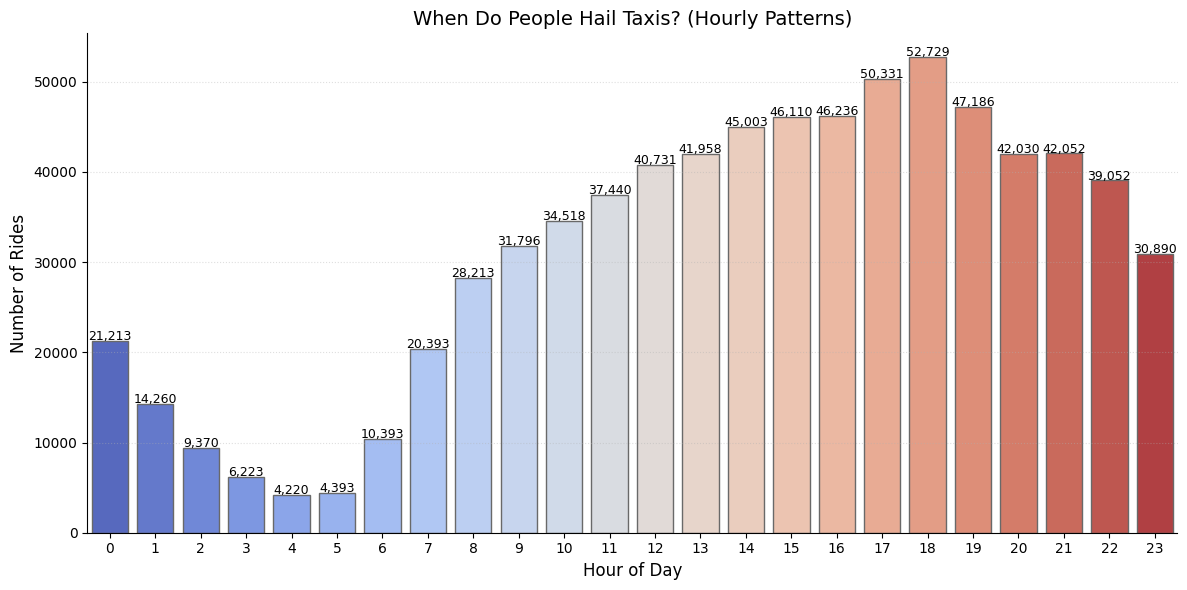

In [63]:
# Find and show the hourly trends in taxi pickups

pickup_counts = (
    data0['tpep_pickup_datetime']
    .dt.hour
    .value_counts()
    .reindex(range(24))
    .fillna(0)
    .sort_index()
)

plt.figure(figsize=(12, 6))
bar_chart = sns.barplot(
    x=pickup_counts.index,
    y=pickup_counts.values,
    palette='coolwarm',
    edgecolor='dimgray'
)


plt.title("When Do People Hail Taxis? (Hourly Patterns)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.xticks(range(0, 24))


for hour, count in pickup_counts.items():
    bar_chart.text(hour, count + 100, f"{count:,}",
                  ha='center', fontsize=9)


plt.grid(axis='y', linestyle=':', alpha=0.4)
sns.despine()
plt.tight_layout()
plt.show()


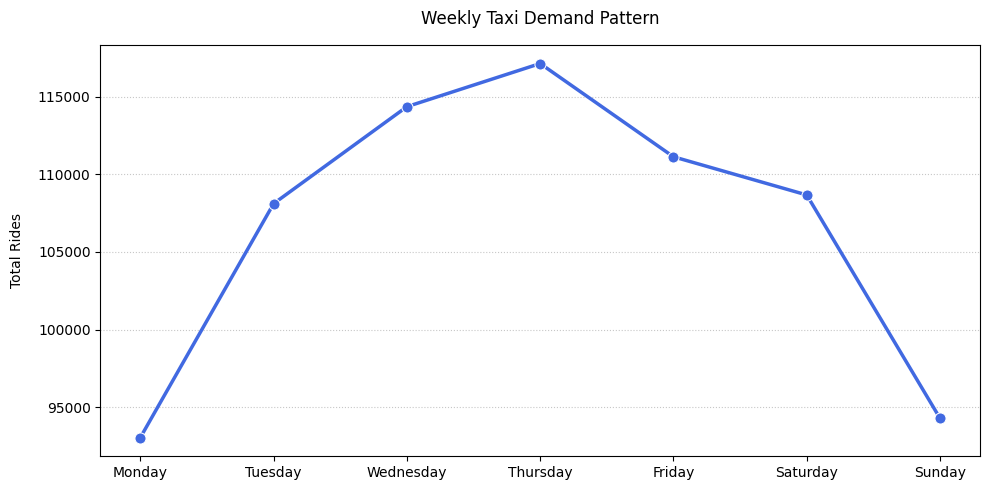

In [64]:
# Find and show the daily trends in taxi pickups (days of the week)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = data0['tpep_pickup_datetime'].dt.day_name().value_counts().reindex(ordered_days)

plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_counts.index, y=daily_counts.values,
             marker='o', markersize=8, color='royalblue', linewidth=2.5)

plt.title("Weekly Taxi Demand Pattern", pad=15)
plt.xlabel("")
plt.ylabel("Total Rides", labelpad=10)
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()


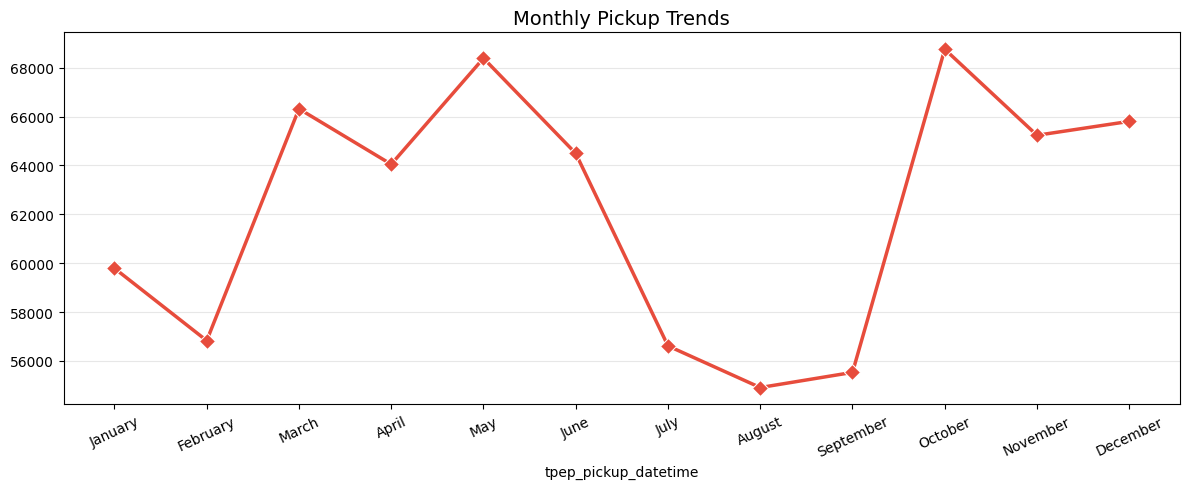

In [65]:
# Show the monthly trends in pickups

months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
monthly = data0['tpep_pickup_datetime'].dt.month_name().value_counts().reindex(months)


plt.figure(figsize=(12, 5))
sns.lineplot(
    x=monthly.index,
    y=monthly.values,
    marker='D',
    linewidth=2.5,
    color='#E74C3C',
    markersize=8
)

plt.title("Monthly Pickup Trends", fontsize=14)
plt.xticks(rotation=25)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [66]:
# Analyse the above parameters
in_rows = data0[(data0['fare_amount'] <= 0) &(data0['tip_amount'] <= 0) &(data0['total_amount'] <= 0) &(data0['trip_distance'] <= 0)]
in_rows

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1247           1  2023-01-01 19:16:54   2023-01-01 19:17:15              1.0   
21636          2  2023-01-12 19:13:41   2023-01-12 19:13:54              1.0   
26542          1  2023-01-14 23:22:45   2023-01-14 23:22:58              1.0   
41629          1  2023-01-22 12:33:16   2023-01-22 12:33:24              1.0   
43605          1  2023-01-23 15:06:45   2023-01-23 15:09:16              1.0   
...          ...                  ...                   ...              ...   
609733         1  2023-05-16 07:06:10   2023-05-16 07:07:29              1.0   
643423         1  2023-05-31 14:06:17   2023-05-31 14:07:08              1.0   
645235         2  2023-07-01 11:54:34   2023-07-01 11:54:54              1.0   
687512         1  2023-07-24 15:49:15   2023-07-24 15:52:30              1.0   
689008         2  2023-07-25 12:54:18   2023-07-25 12:54:29              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1247              0.0         2.0                  N           261   
21636             0.0         1.0                  N           264   
26542             0.0         1.0                  N           132   
41629             0.0         1.0                  N           145   
43605             0.0         1.0                  N           132   
...               ...         ...                ...           ...   
609733            0.0         1.0                  N           145   
643423            0.0         1.0                  N           137   
645235            0.0         1.0                  N           193   
687512            0.0        99.0                  N           140   
689008            0.0         1.0                  N           264   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
1247             261             3  ...    0.0      0.0         0.0   
21636            264             1  ...    0.0      0.0         0.0   
26542            132             3  ...    0.0      0.0         0.0   
41629            145             2  ...    0.0      0.0         0.0   
43605            132             3  ...    0.0      0.0         0.0   
...              ...           ...  ...    ...      ...         ...   
609733           145             1  ...    0.0      0.0         0.0   
643423           137             4  ...    0.0      0.0         0.0   
645235           193             1  ...    0.0      0.0         0.0   
687512           140             1  ...    0.0      0.0         0.0   
689008           264             1  ...    0.0      0.0         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
1247             0.0                    0.0           0.0   
21636            0.0                    0.0           0.0   
26542            0.0                    0.0           0.0   
41629            0.0                    0.0           0.0   
43605            0.0                    0.0           0.0   
...              ...                    ...           ...   
609733           0.0                    0.0           0.0   
643423           0.0                    0.0           0.0   
645235           0.0                    0.0           0.0   
687512           0.0                    0.0           0.0   
689008           0.0                    0.0           0.0   

        congestion_surcharge  airport_fee        date hour  
1247                     0.0          0.0  2023-01-01   19  
21636                    0.0          0.0  2023-01-12   19  
26542                    0.0          0.0  2023-01-14   23  
41629                    0.0          0.0  2023-01-22   12  
43605                    0.0          0.0  2023-01-23   15  
...                      ...          ...         ...  ...  
609733                   0.0          0.0  2023-05-16    7  
643423                   0.0          0.0  2023-05-31   14  
645235                   0.0          0.0  2023-07-01   11  
687512    

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these? - Yes

In [67]:
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
mask = (data0[cols_to_check] > 0).all(axis=1)

clean_data = data0[mask].copy()

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [68]:
# Create a df with non zero entries for the selected parameters.
filtered_data = clean_data[(clean_data['trip_distance'] == 0) &(clean_data['PULocationID'] == clean_data['DOLocationID'])]
filtered_data

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]

In [81]:
# dropping these rows
#clean_data=clean_data[~((clean_data['trip_distance'] == 0) &(clean_data['PULocationID'] == clean_data['DOLocationID']))]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [69]:
clean_data['total_amount'].groupby(clean_data.tpep_pickup_datetime.dt.month_name()).sum()

tpep_pickup_datetime
April        1451067.69
August       1212916.36
December     1469401.83
February     1245177.68
January      1308488.72
July         1258634.56
June         1490498.15
March        1496120.48
May          1608933.95
November     1507332.83
October      1608312.68
September    1303419.23
Name: total_amount, dtype: float64

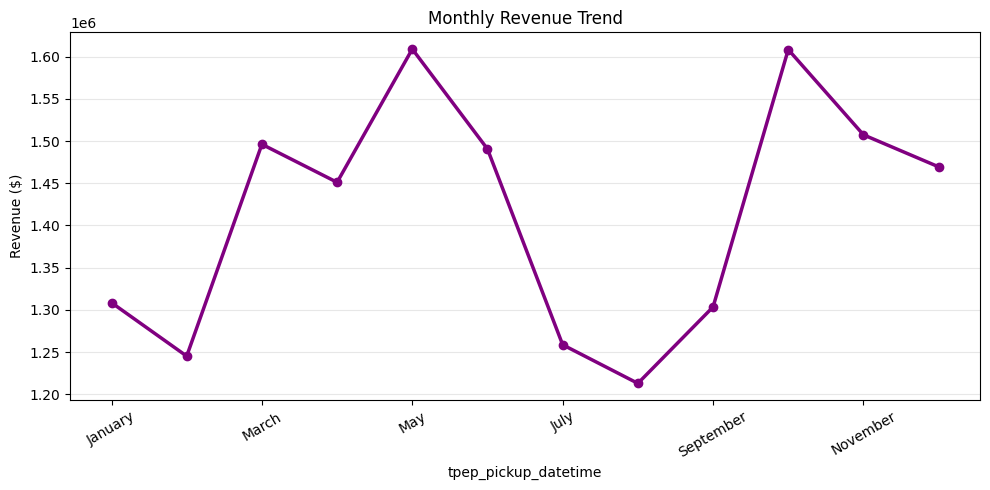

In [70]:
# Group data by month and analyse monthly revenue
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

(clean_data.groupby(clean_data['tpep_pickup_datetime'].dt.month_name())['total_amount'].sum()
 .reindex(months)
 .plot(kind='line', marker='o', figsize=(10,5), color='purple', lw=2.5))

plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [71]:
clean_data['total_amount'].groupby(clean_data.tpep_pickup_datetime.dt.quarter).sum()

tpep_pickup_datetime
1    4049786.88
2    4550499.79
3    3774970.15
4    4585047.34
Name: total_amount, dtype: float64

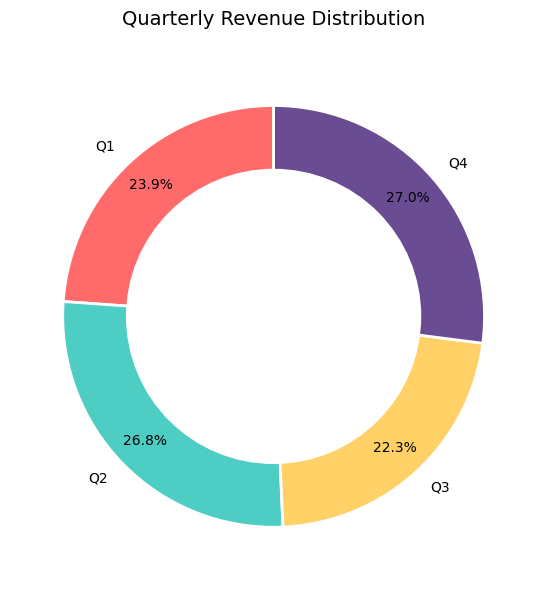

In [72]:
# Calculate proportion of each quarter
plt.figure(figsize=(8, 6))
rev_qtr = clean_data.groupby(clean_data['tpep_pickup_datetime'].dt.quarter)['total_amount'].sum()

plt.pie(
    rev_qtr,
    labels=['Q1', 'Q2', 'Q3', 'Q4'],
    autopct='%1.1f%%',
    pctdistance=0.85,
    colors=['#FF6B6B', '#4ECDC4', '#FFD166', '#6A4C93'],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Quarterly Revenue Distribution", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [82]:
#clean_data.info()
valid_data = clean_data[clean_data['trip_distance'] > 0]
clean_data['trip_distance'].corr(clean_data['fare_amount'])

np.float64(0.9478467791284729)

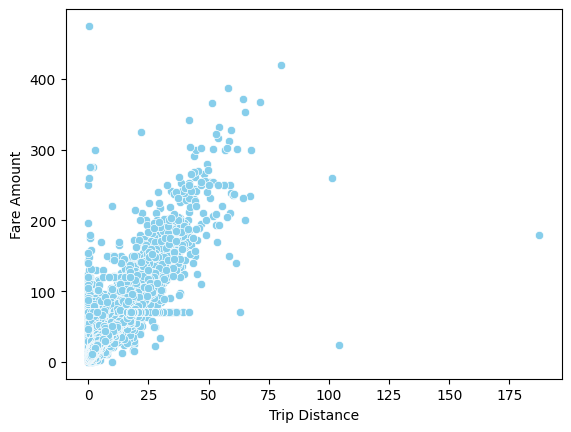

In [83]:
# Show how trip fare is affected by distance
sns.scatterplot(data=clean_data[clean_data['trip_distance']!=0], x= 'trip_distance',y= 'fare_amount',color = 'skyblue')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

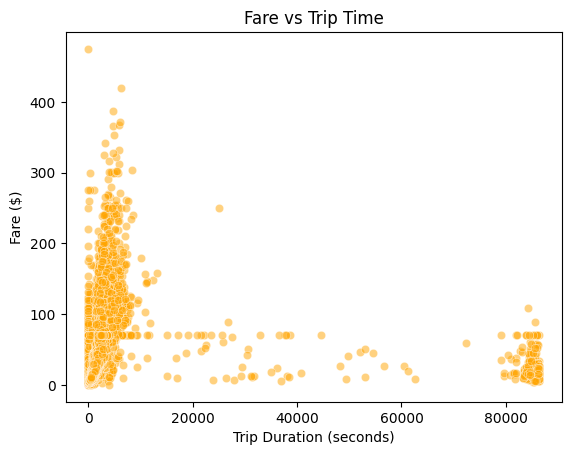

In [84]:
# Calculate trip time in seconds
clean_data['trip_seconds'] = (clean_data['tpep_dropoff_datetime'] - clean_data['tpep_pickup_datetime']).dt.total_seconds()
sns.scatterplot(
    data=clean_data[clean_data['trip_seconds'] > 0],
    x='trip_seconds',
    y='fare_amount',
    color='orange',
    alpha=0.5
)
plt.title("Fare vs Trip Time")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Fare ($)")
plt.show()

In [85]:
clean_data['trip_duration'].corr(clean_data['fare_amount'])

np.float64(0.33449085322598543)

TypeError: 'float' object cannot be interpreted as an integer

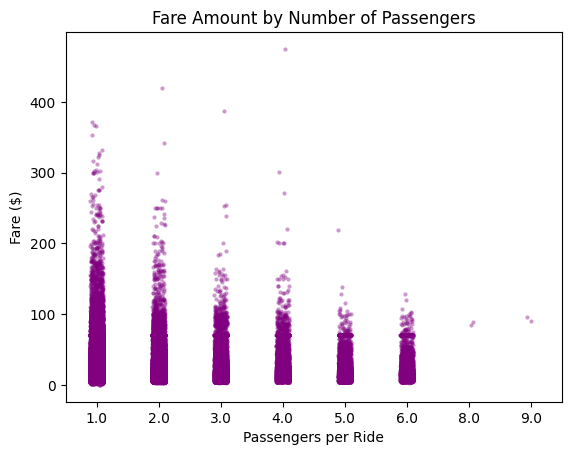

In [86]:
# Show relationship between fare and number of passengers

sns.stripplot(
    data=clean_data,
    x='passenger_count',
    y='fare_amount',
    color='purple',
    jitter=True,
    alpha=0.4,
    size=3
)

# Format the plot
plt.title("Fare Amount by Number of Passengers")
plt.xlabel("Passengers per Ride")
plt.ylabel("Fare ($)")
plt.xticks(range(0, clean_data['passenger_count'].max() + 1))  # Show all passenger counts
plt.show()

In [87]:
clean_data['passenger_count'].corr(clean_data['fare_amount'])

np.float64(0.0347723742509206)

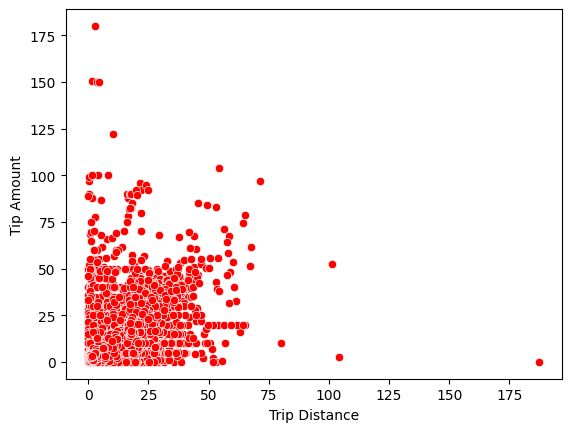

In [88]:
# Show relationship between tip and trip distance
sns.scatterplot(data=clean_data, x= 'trip_distance',y= 'tip_amount',color = 'red')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [89]:
# Analyse the distribution of different payment types.
payment_counts = clean_data['payment_type'].value_counts().sort_index()
payment_counts


payment_type
1    571839
2         8
3         4
4         7
Name: count, dtype: int64

/tmp/ipython-input-240845739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='payment', data=clean_data, palette='Set2')


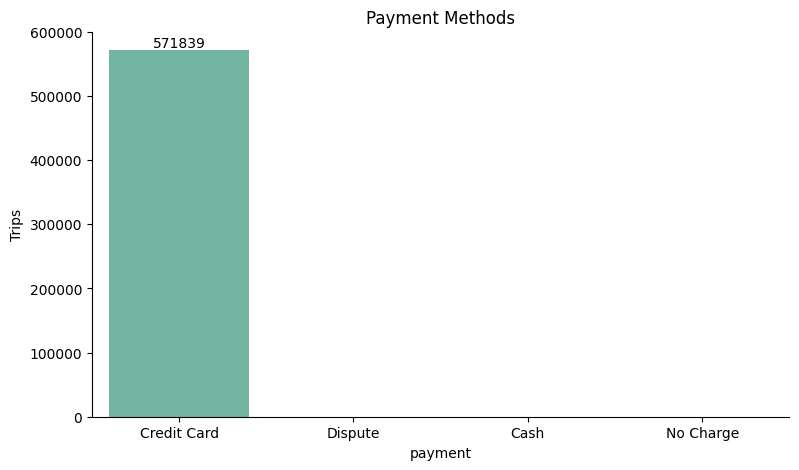

In [90]:
clean_data['payment'] = clean_data['payment_type'].map({1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'})
plt.figure(figsize=(9,5))
ax = sns.countplot(x='payment', data=clean_data, palette='Set2')
ax.bar_label(ax.containers[0])
plt.title('Payment Methods'); plt.ylabel('Trips'); sns.despine(); plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [96]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [91]:
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/MyDrive/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

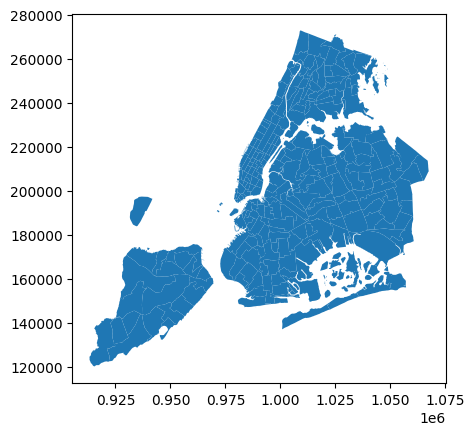

In [92]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [93]:
# Merge zones and trip records using locationID and PULocationID
combined_data= pd.merge(clean_data,zones,left_on='PULocationID',right_on='LocationID')
combined_data.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
2         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
3         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
4         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.24         1.0                  N           161           237   
1          19.24        99.0                  N            66           107   
2           7.10         1.0                  N           246            37   
3           1.59         1.0                  N            79           164   
4           3.16         1.0                  N            79           256   

   payment_type  ...  trip_duration  trip_seconds      payment  OBJECTID  \
0             1  ...          305.0         305.0  Credit Card       161   
1             1  ...         1080.0        1080.0  Credit Card        66   
2             1  ...         2017.0        2017.0  Credit Card       246   
3             1  ...          631.0         631.0  Credit Card        79   
4             1  ...          953.0         953.0  Credit Card        79   

   Shape_Leng  Shape_Area                       zone  LocationID    borough  \
0    0.035804    0.000072             Midtown Center         161  Manhattan   
1    0.054633    0.000108         DUMBO/Vinegar Hill          66   Brooklyn   
2    0.069467    0.000281  West Chelsea/Hudson Yards         246  Manhattan   
3    0.042625    0.000108               East Village          79  Manhattan   
4    0.042625    0.000108               East Village          79  Manhattan   

                                            geometry  
0  POLYGON ((991081.026 214453.698, 990952.644 21...  
1  POLYGON ((990055.507 196472.349, 990004.46 196...  
2  POLYGON ((983031.177 217138.506, 983640.32 216...  
3  POLYGON ((988746.067 202151.955, 988733.885 20...  
4  POLYGON ((988746.067 202151.955, 988733.885 20...  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [94]:
# Group data by location and calculate the number of trips
location_groupby_trip =pd.DataFrame(combined_data['LocationID'].value_counts()).reset_index()
location_groupby_trip

LocationID  count
0           237  28147
1           161  27049
2           236  25889
3           132  25257
4           162  21165
..          ...    ...
207         174      1
208         192      1
209          19      1
210          78      1
211         165      1

[212 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [95]:
# Merge trip counts back to the zones GeoDataFrame
zones= pd.merge(zones,location_groupby_trip, left_on ='LocationID',right_on = 'LocationID')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         4    0.043567    0.000112            Alphabet City           4   
2         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
3         7    0.107417    0.000390                  Astoria           7   
4         9    0.099784    0.000338               Auburndale           9   

         borough                                           geometry  count  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...     16  
1      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...    650  
2  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...      1  
3         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...    139  
4         Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...      3

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

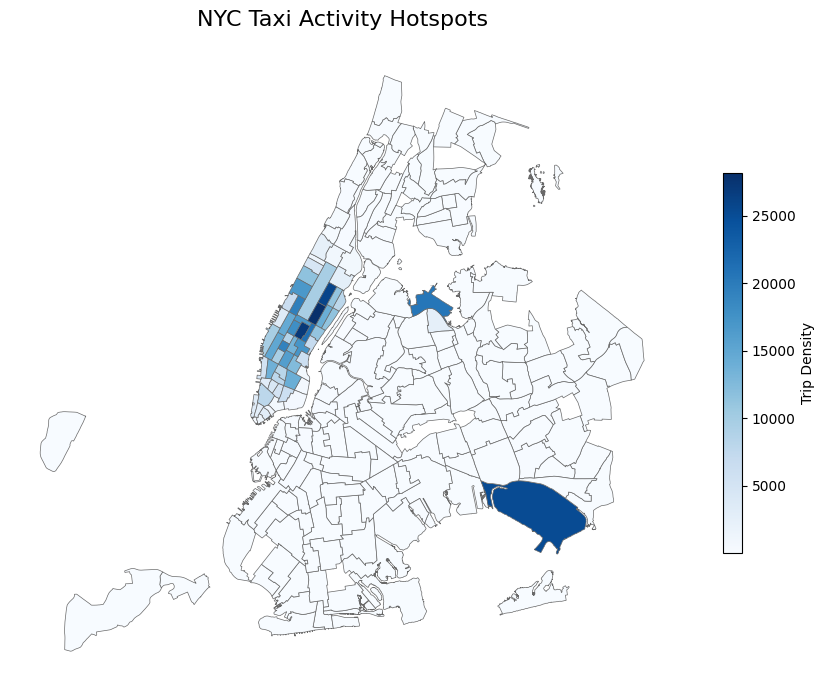

In [99]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

zones.plot(column='count',
           cmap='Blues',
           linewidth=0.5,
           ax=ax,
           edgecolor='dimgray',
           legend=True,
           legend_kwds={
               'label': "Trip Density",
               'orientation': "vertical",
               'shrink': 0.6
           })

ax.set_title("NYC Taxi Activity Hotspots", fontsize=16, pad=15)
ax.axis('off')

plt.tight_layout()
plt.show()



In [100]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sort = zones.sort_values(by='count', ascending=False)
zones_sort.head(5)

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
190       237    0.042213    0.000096  Upper East Side South         237   
127       161    0.035804    0.000072         Midtown Center         161   
189       236    0.044252    0.000103  Upper East Side North         236   
102       132    0.245479    0.002038            JFK Airport         132   
128       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  count  
190  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...  28147  
127  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...  27049  
189  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...  25889  
102     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...  25257  
128  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...  21165

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**.

* Demand & Location Patterns:
High rider concentration is consistently observed in Upper East Side South, making it one of the busiest pickup and drop-off zones. Peak trip volumes occur around 6 PM, with Thursdays and the month of October standing out as particularly high-demand periods.

* Revenue Insights:
Annual revenue sees its highest contributions in Q4, with notable monthly peaks in May and October.

* Fare Influencers:
Among all factors, trip distance shows the strongest impact on fare amount, with a correlation of approximately 0.95. In contrast, trip duration has a moderate effect, while passenger count shows no meaningful correlation.

* Tipping Behavior:
Tip amounts also exhibit a strong positive correlation with trip distance, suggesting that passengers are more likely to tip generously on longer rides.

You can consider the following points:

* Busiest hours, days and months: hour: 6PM day: Thur Months: Oct
* Trends in revenue collected: Highest in May and Oct
* Trends in quarterly revenue: Q4 has the highest revenue share
* How fare depends on trip distance, trip duration and passenger counts: Highest correlation exists with trip distance and there is no correlation with passenger count, and minor correlation with trip duration.
* How tip amount depends on trip distance: High correlation
* Busiest zones: Upper East Side South


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [107]:
# Find routes which have the slowest speeds at different times of the day

# Find routes which have the slowest speeds at different times of the day
valid_data= clean_data[clean_data['tpep_dropoff_datetime'] > clean_data['tpep_pickup_datetime']].copy()
valid_data['trip_duration_min'] = (valid_data['tpep_dropoff_datetime'] - valid_data['tpep_pickup_datetime']).dt.total_seconds() / 60
# Extract hour of the day
valid_data['pickup_hour'] = valid_data['tpep_pickup_datetime'].dt.hour
#Group by route (PU, DO) and hour
grouped = valid_data.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
#Calculate average duration and average distance per route per hour
route_stats = grouped.agg(
    avg_duration_min=('trip_duration_min', 'mean'),
    sum_distance=('trip_distance', 'sum')  # assuming you have this
).reset_index()
#Compute average speed: distance / duration
route_stats['avg_speed'] = route_stats['sum_distance'] / (route_stats['avg_duration_min'] / 60)  # speed in distance units per hour
#Identify slowest routes (lowest average speed)
slow_routes = route_stats.sort_values(by='avg_speed').head(15)
slow_routes



PULocationID  DOLocationID  pickup_hour  avg_duration_min  \
3634             43            10           10         53.966667   
10834            70           138            6       1042.566667   
45072           161           238            7       1395.500000   
39205           144           217           16       1419.233333   
6389             48           184            1         65.666667   
1521             13           209            7        709.741667   
54769           193           193           11          4.000000   
1832             13           264           17          7.600000   
17392            90           209           11       1427.950000   
69581           238           249            1       1396.200000   
61026           231            61            5       1396.433333   
15576            87           255            1       1395.016667   
60961           231            48            6       1020.983333   
9042             68            80           20       1420.083333   
18032            97            97           16          2.000000   

       sum_distance  avg_speed  
3634           0.02   0.022236  
10834          1.49   0.085750  
45072          2.74   0.117807  
39205          2.97   0.125561  
6389           0.14   0.127919  
1521           1.72   0.145405  
54769          0.01   0.150000  
1832           0.02   0.157895  
17392          3.77   0.158409  
69581          4.58   0.196820  
61026          4.71   0.202373  
15576          4.94   0.212471  
60961          4.07   0.239181  
9042           6.72   0.283927  
18032          0.01   0.300000

How does identifying high-traffic, high-demand routes help us?  Ans: It helps us to plan things ahead based on the data.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

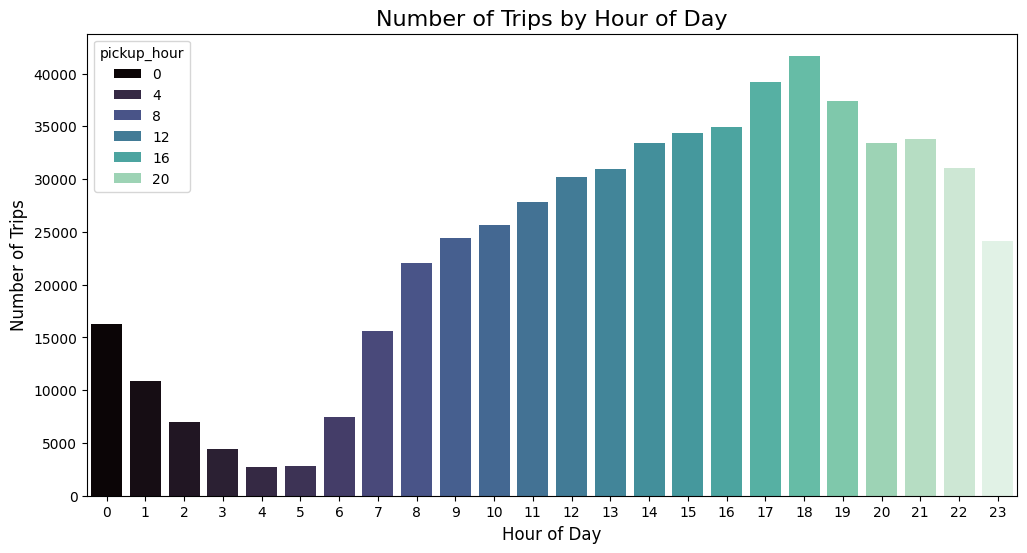

In [112]:
# Visualise the number of trips per hour and find the busiest hour
trip_counts = valid_data['pickup_hour'].value_counts().sort_index()
#visualise
plt.figure(figsize=(12, 6))
sns.barplot(x=trip_counts.index, y=trip_counts.values,hue=trip_counts.index, palette='mako')
plt.title('Number of Trips by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(24))
plt.show()


In [113]:
# from the above data it can be concluded that 6 pm is busiest
busiest_hour = valid_data['pickup_hour'].value_counts().idxmax()
busiest_hour

np.int32(18)

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [114]:
hourly_sample = valid_data.groupby('pickup_hour').size().reset_index(name='sample_trip_count')


sampling_ratio = 0.05
hourly_sample['estimated_trip_count'] = hourly_sample['sample_trip_count'] / sampling_ratio

# Top 5 Busiest hours and their trips

top5_hours = hourly_sample.sort_values(by='estimated_trip_count', ascending=False).head(5)
print(top5_hours)

    pickup_hour  sample_trip_count  estimated_trip_count
18           18              41693              833860.0
17           17              39165              783300.0
19           19              37423              748460.0
16           16              34963              699260.0
15           15              34414              688280.0


In [109]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
trip_counts_scaled = trip_counts / sample_fraction
trip_counts_scaled

pickup_hour
0      813050.0
1      541400.0
2      347350.0
3      221450.0
4      135100.0
5      142900.0
6      372500.0
7      780550.0
8     1104050.0
9     1222150.0
10    1284450.0
11    1389650.0
12    1508000.0
13    1548700.0
14    1673100.0
15    1720700.0
16    1748150.0
17    1958200.0
18    2084650.0
19    1871150.0
20    1671950.0
21    1691700.0
22    1554950.0
23    1205350.0
Name: count, dtype: float64

In [110]:
top5_hours = trip_counts_scaled.sort_values(ascending=False).head(5)
top5_hours

pickup_hour
18    2084650.0
17    1958200.0
19    1871150.0
16    1748150.0
15    1720700.0
Name: count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

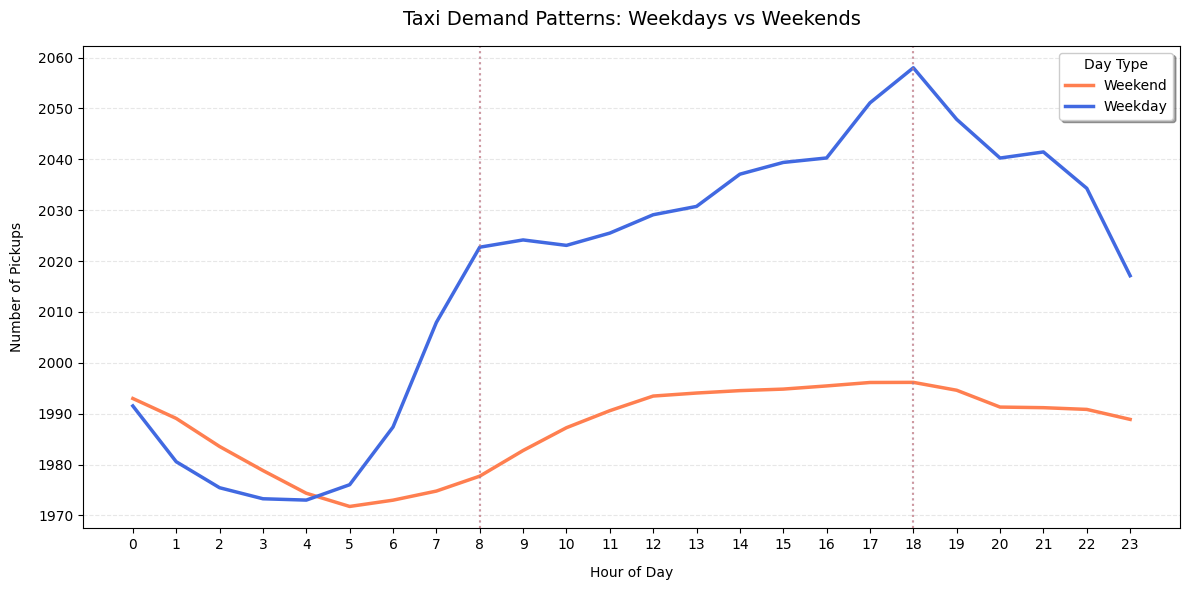

In [119]:
# Compare traffic trends for the week days and weekends
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=valid_data.assign(
        day_type=lambda x: np.where(x['tpep_pickup_datetime'].dt.dayofweek < 5, 'Weekday', 'Weekend'),
        hour=lambda x: x['tpep_pickup_datetime'].dt.hour
    ),
    x='hour',
    y='tpep_pickup_datetime',
    hue='day_type',
    estimator='count',
    errorbar=None,
    palette={'Weekday': 'royalblue', 'Weekend': 'coral'},
    linewidth=2.5
)

plt.title('Taxi Demand Patterns: Weekdays vs Weekends', fontsize=14, pad=15)
plt.xlabel('Hour of Day', labelpad=10)
plt.ylabel('Number of Pickups', labelpad=10)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.legend(title='Day Type', frameon=True, shadow=True)

for day_type, color in [('Weekday', 'royalblue'), ('Weekend', 'coral')]:
    plt.axvline(x=8, color=color, linestyle=':', alpha=0.5)
    plt.axvline(x=18, color=color, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

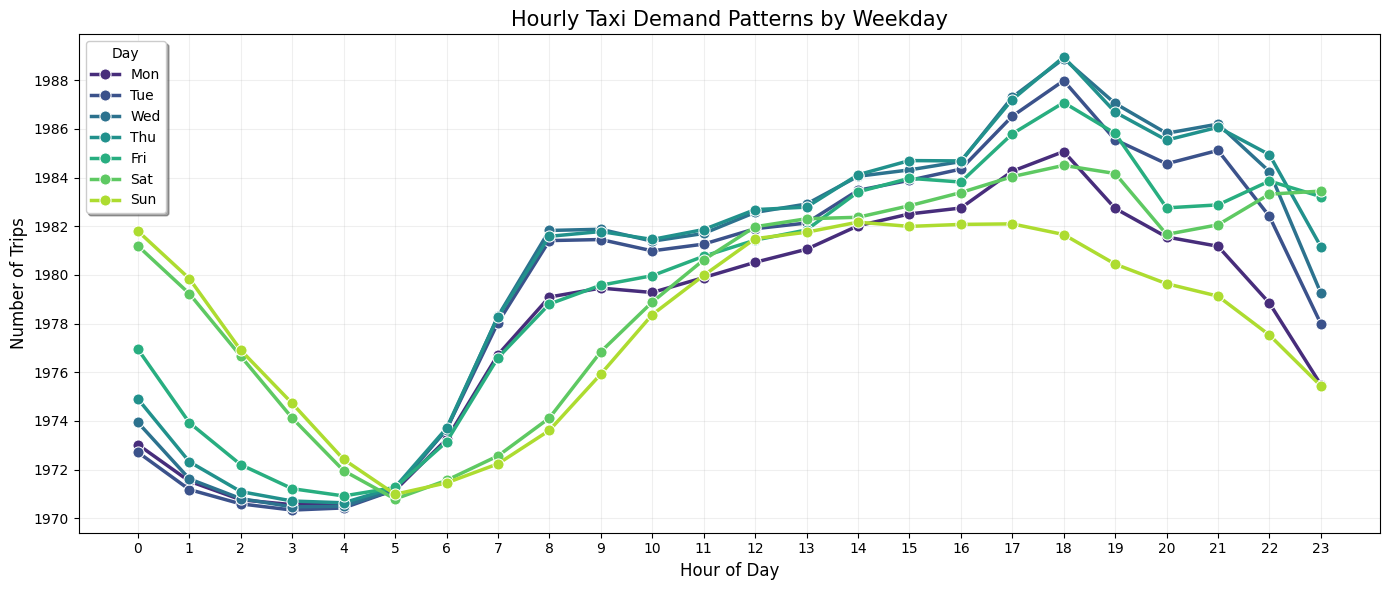

In [122]:
# Plotting day-wise trends
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=valid_data.assign(
        day=valid_data['tpep_pickup_datetime'].dt.day_name().str[:3]
    ),
    x=valid_data['tpep_pickup_datetime'].dt.hour,
    y='tpep_pickup_datetime',
    hue='day',
    hue_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    palette='viridis',
    estimator='count',
    errorbar=None,
    linewidth=2.5,
    marker='o',
    markersize=8
)

plt.title('Hourly Taxi Demand Patterns by Weekday', fontsize=15)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

plt.xticks(range(0, 24))
plt.grid(alpha=0.2)
plt.legend(title='Day', frameon=True, shadow=True)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [125]:
# Find top 10 pickup and dropoff zones
# Group by pickup location and hour, count number of trips
#Method 1
pickup_counts = valid_data.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
# Get top 10 zones by total pickup count
top_pickup_zone = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index
# Filter to just top zones
pickup_top10 = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zone)]
pickup_top10.PULocationID.unique()

array([132, 138, 142, 161, 162, 170, 186, 230, 236, 237])

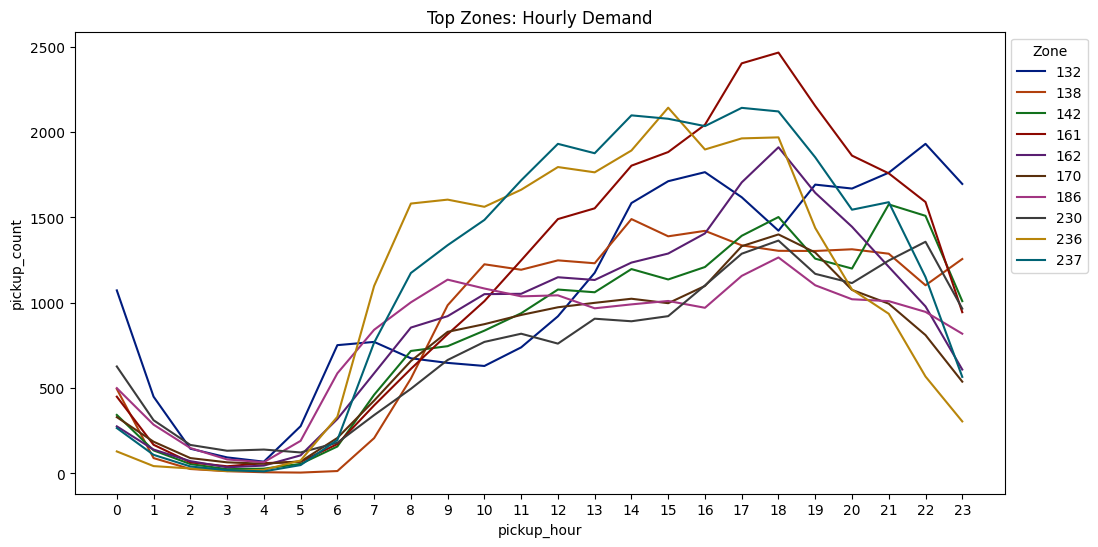

In [128]:
#Plotting Top zones
plt.figure(figsize=(12,6))
sns.lineplot(data=pickup_top10, x='pickup_hour', y='pickup_count', hue='PULocationID',
             palette='dark', errorbar=None, linewidth=1.5)
plt.title("Top Zones: Hourly Demand")
plt.legend(title='Zone', bbox_to_anchor=(1,1))
plt.xticks(range(24))
plt.show()

In [132]:
#dropoff
valid_data['dropoff_hour'] = valid_data['tpep_dropoff_datetime'].dt.hour
dropoff_counts = valid_data.groupby(['DOLocationID', 'dropoff_hour']).size().reset_index(name='dropoff_count')
top_dropoff_zone = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index
dropoff_top10 = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zone)]
dropoff_top10.DOLocationID.unique()

array([ 68, 141, 142, 161, 162, 170, 230, 236, 237, 239])

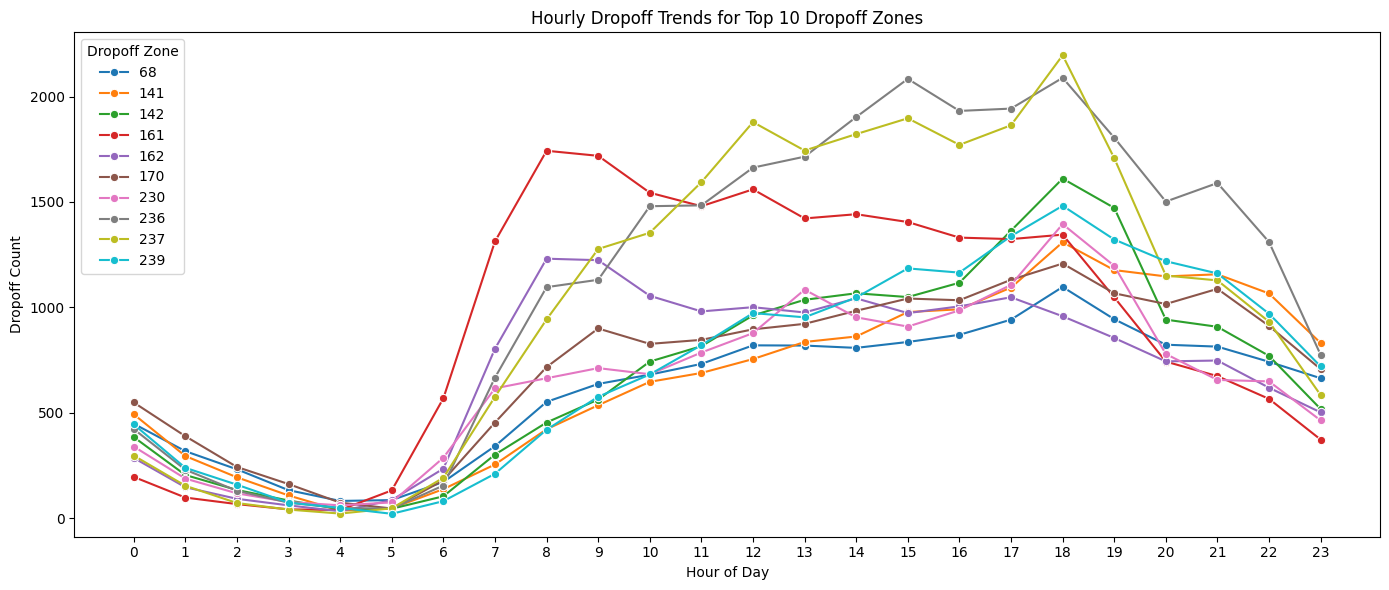

In [133]:
#Plot of drop zones
plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_top10, x='dropoff_hour', y='dropoff_count', hue='DOLocationID', palette='tab10', marker='o')
plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Dropoff Count')
plt.legend(title='Dropoff Zone')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [135]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_count_ratio= pd.DataFrame(valid_data['PULocationID'].value_counts().reset_index())
dropoff_count_ratio = pd.DataFrame(valid_data['DOLocationID'].value_counts().reset_index())
pickup_dropoff_merged = pd.merge(pickup_count_ratio,dropoff_count_ratio,left_on='PULocationID',right_on='DOLocationID',suffixes=['_PU','_DO'])
pickup_dropoff_merged['PU_DO_ratio']= round(pickup_dropoff_merged['count_PU']/pickup_dropoff_merged['count_DO'],2)
pickup_dropoff_merged=pickup_dropoff_merged.sort_values(by=['PU_DO_ratio'],ascending=False)
zone_pu_do = pd.merge(zones, pickup_dropoff_merged, how='left', left_on='LocationID',right_on ='PULocationID')
zone_pu_do

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           4    0.043567    0.000112            Alphabet City           4   
2           6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
3           7    0.107417    0.000390                  Astoria           7   
4           9    0.099784    0.000338               Auburndale           9   
..        ...         ...         ...                      ...         ...   
208       258    0.089013    0.000366                Woodhaven         258   
209       260    0.133514    0.000422                 Woodside         260   
210       261    0.027120    0.000034       World Trade Center         261   
211       262    0.049064    0.000122           Yorkville East         262   
212       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  count  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...     16   
1        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...    650   
2    Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...      1   
3           Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...    139   
4           Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...      3   
..             ...                                                ...    ...   
208         Queens  POLYGON ((1027223.758 190451.926, 1027233.961 ...      2   
209         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...     43   
210      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   2808   
211      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   7994   
212      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  11316   

     PULocationID  count_PU  DOLocationID  count_DO  PU_DO_ratio  
0               1        16             1      1720         0.01  
1               4       650             4      2106         0.31  
2               6         1             6         9         0.11  
3               7       139             7      1452         0.10  
4               9         3             9        34         0.09  
..            ...       ...           ...       ...          ...  
208           258         2           258        53         0.04  
209           260        43           260       271         0.16  
210           261      2808           261      2603         1.08  
211           262      7994           262      9499         0.84  
212           263     11316           263     12640         0.90  

[213 rows x 13 columns]

In [136]:
primary_zone=zone_pu_do[['zone','PU_DO_ratio']].head()
primary_zone

zone  PU_DO_ratio
0           Newark Airport         0.01
1            Alphabet City         0.31
2  Arrochar/Fort Wadsworth         0.11
3                  Astoria         0.10
4               Auburndale         0.09

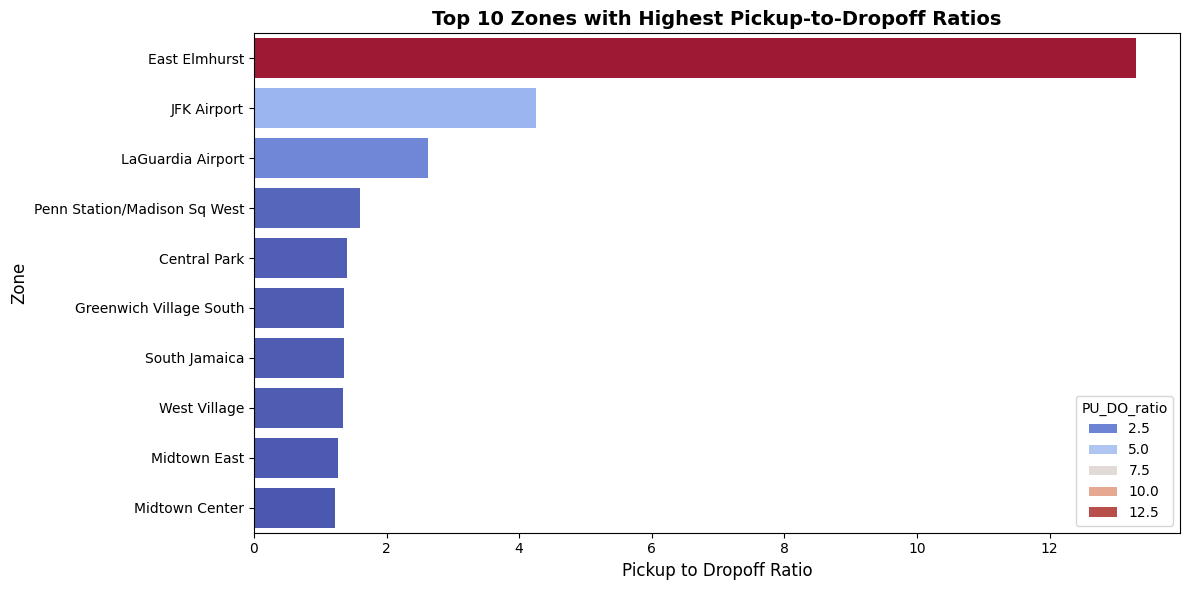

In [141]:
# Top 10 zones with highest pickup-to-dropoff ratios
zone_pu_do=zone_pu_do.sort_values(by='PU_DO_ratio',ascending=False)
top_zone=zone_pu_do[['zone','PU_DO_ratio']].head(10)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_zone, x='PU_DO_ratio', y='zone',hue='PU_DO_ratio', palette='coolwarm')
# Labels and title
plt.xlabel('Pickup to Dropoff Ratio', fontsize=12)
plt.ylabel('Zone', fontsize=12)
plt.title('Top 10 Zones with Highest Pickup-to-Dropoff Ratios', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [142]:
bottom_zone=zone_pu_do[['zone','PU_DO_ratio']].tail(10)
bottom_zone

zone  PU_DO_ratio
122      Marine Park/Mill Basin         0.03
9                     Bay Ridge         0.02
162                Saint Albans         0.02
14             Bensonhurst West         0.02
174  Spuyten Duyvil/Kingsbridge         0.02
105           Kew Gardens Hills         0.02
207             Windsor Terrace         0.02
165              Sheepshead Bay         0.02
0                Newark Airport         0.01
131                     Midwood         0.01

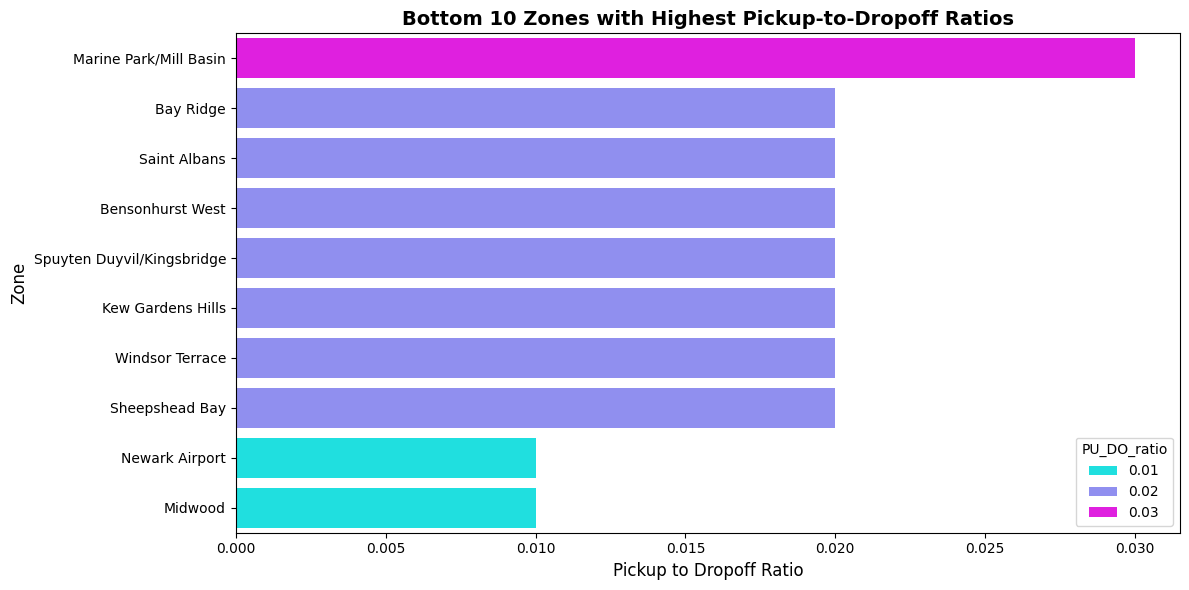

In [143]:
# Bottom 10 zones with highest pickup-to-dropoff ratios
bottom_zone=zone_pu_do[['zone','PU_DO_ratio']].tail(10)
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_zone, x='PU_DO_ratio', y='zone',hue='PU_DO_ratio', palette='cool')

# Labels and title
plt.xlabel('Pickup to Dropoff Ratio', fontsize=12)
plt.ylabel('Zone', fontsize=12)
plt.title('Bottom 10 Zones with Highest Pickup-to-Dropoff Ratios', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

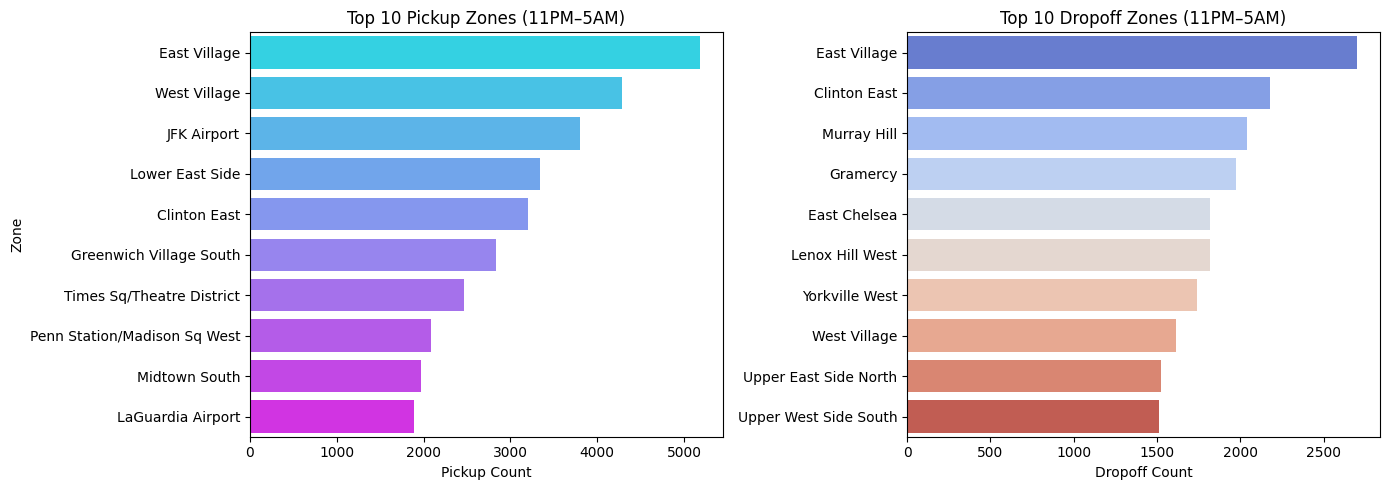

In [144]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones

night_df = valid_data[(valid_data['pickup_hour'] >= 23) | (valid_data['pickup_hour'] <= 5)]
top_night_pickups = night_df['PULocationID'].value_counts().head(10).reset_index()
top_night_pickups.columns = ['LocationID', 'Pickup_Count']
top_night_pickups = top_night_pickups.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
top_night_dropoffs = night_df['DOLocationID'].value_counts().head(10).reset_index()
top_night_dropoffs.columns = ['LocationID', 'Dropoff_Count']
top_night_dropoffs = top_night_dropoffs.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')


plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=top_night_pickups, y='zone', x='Pickup_Count',hue='zone', palette='cool')
plt.title('Top 10 Pickup Zones (11PM–5AM)', fontsize=12)
plt.xlabel('Pickup Count')
plt.ylabel('Zone')


plt.subplot(1, 2, 2)
sns.barplot(data=top_night_dropoffs, y='zone', x='Dropoff_Count',hue='zone', palette='coolwarm')
plt.title('Top 10 Dropoff Zones (11PM–5AM)', fontsize=12)
plt.xlabel('Dropoff Count')
plt.ylabel('')

plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [146]:

night_rides = valid_data[ (valid_data['tpep_pickup_datetime'].dt.time >= pd.to_datetime('23:00:00').time()) | (valid_data['tpep_pickup_datetime'].dt.time < pd.to_datetime('05:00:00').time())]


Revenue during night hours: $ 1932099.66 
 Revenue during day hours: $ 15027073.47


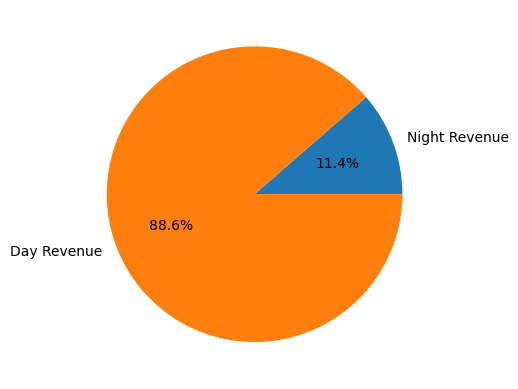

In [147]:
# Filter for day hours (5AM to 10 PM)
day_rides = valid_data[ (valid_data['tpep_pickup_datetime'].dt.time < pd.to_datetime('23:00:00').time()) & (valid_data['tpep_pickup_datetime'].dt.time >= pd.to_datetime('05:00:00').time())]

night_revenue = round(night_rides['total_amount'].sum(),2)
day_revenue =round(day_rides['total_amount'].sum(),2)

print("Revenue during night hours: $",night_revenue ,'\n',"Revenue during day hours: $",day_revenue)

plt.pie(x=[night_revenue,day_revenue],labels=['Night Revenue','Day Revenue'], autopct = '%1.1f%%')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [149]:
# Analyse the fare per mile per passenger for different passenger counts
valid_data[['passenger_count','total_amount','trip_distance']]

average_amount=pd.DataFrame(valid_data.groupby('passenger_count')[['total_amount','trip_distance']].sum().reset_index())
average_amount['avg_fare_per_mile']= round(average_amount['total_amount']/average_amount['trip_distance'],2)
average_amount['avg_fare_per_mile_per_passenger']= average_amount['avg_fare_per_mile']/average_amount['passenger_count']
average_amount[['passenger_count','avg_fare_per_mile_per_passenger']]

passenger_count  avg_fare_per_mile_per_passenger
0              1.0                         8.720000
1              2.0                         4.050000
2              3.0                         2.803333
3              4.0                         2.072500
4              5.0                         1.736000
5              6.0                         1.446667
6              8.0                         0.856250
7              9.0                         1.596667

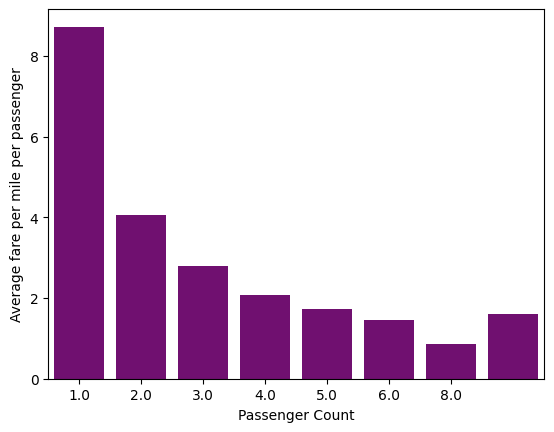

In [150]:
# Compare the average fare per mile for different days and for different times of the day

sns.barplot(x= average_amount['passenger_count'],y =average_amount['avg_fare_per_mile_per_passenger'],color = 'purple')
plt.xlabel('Passenger Count')
plt.ylabel('Average fare per mile per passenger')
plt.xticks(range(0,7))
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [151]:
# Compare the average fare per mile for different days and for different times of the day
valid_data['fare_per_mile'] = valid_data['fare_amount'] / valid_data['trip_distance']

avgfare_day_hour = valid_data.pivot_table( values='fare_per_mile', index=valid_data['tpep_pickup_datetime'].dt.day_name(),columns=valid_data['tpep_pickup_datetime'].dt.hour,aggfunc='mean')
avgfare_day_hour

tpep_pickup_datetime         0          1          2          3          4   \
tpep_pickup_datetime                                                          
Friday                 7.390254   8.231670  13.780471  10.218469   5.404474   
Monday                 6.486901   8.574686   8.109839  22.669520   5.434827   
Saturday               7.357807   7.284274   6.652098   7.302348  31.484215   
Sunday                 6.847107   6.766634   8.480843   7.015682   6.304636   
Thursday              15.383162  19.564131   6.034208   6.040504  10.629749   
Tuesday                9.720512   8.647292   5.990540  14.096710   5.152792   
Wednesday              6.819095   9.791559   5.968102   5.918405   6.149027   

tpep_pickup_datetime         5          6          7          8          9   \
tpep_pickup_datetime                                                          
Friday                12.048619   6.030291  10.265655   8.737916   8.400384   
Monday                 6.427882   7.022914   6.827126  10.217883   8.712893   
Saturday              13.382568  35.737100   8.401767   7.609496   6.798331   
Sunday                13.560737  10.091011   8.022851  12.933696  13.675866   
Thursday               5.735140   8.951226   7.087549   9.475951   8.658381   
Tuesday                5.629255   8.244368   8.188315  10.251039  11.658709   
Wednesday              6.706387   6.225303  10.103505   9.303137   9.097010   

tpep_pickup_datetime  ...         14         15         16         17  \
tpep_pickup_datetime  ...                                               
Friday                ...  10.788283   9.358011  12.321209  10.463314   
Monday                ...   9.784684  10.087843  12.867945   8.594209   
Saturday              ...   9.444663   8.300366  12.327355  10.292833   
Sunday                ...  12.087221   8.444205  16.286715  13.538251   
Thursday              ...  11.924109  12.212091  15.231638   9.825602   
Tuesday               ...  11.904939   9.869109  12.199545   9.384492   
Wednesday             ...   9.507127   9.905254   9.664959  12.607564   

tpep_pickup_datetime         18         19        20         21         22  \
tpep_pickup_datetime                                                         
Friday                12.430365   8.412450  7.490073   7.738562   8.593710   
Monday                10.266895   9.585250  7.278694   7.228761  11.316878   
Saturday               8.427896   9.925765  8.219677   7.719021   7.585176   
Sunday                12.150279  12.022482  9.190179  11.044238  10.513434   
Thursday               8.636123  11.183953  7.370798   7.800191   7.646905   
Tuesday                8.644675   8.209049  8.585915   8.477855   6.505998   
Wednesday             10.943158   8.039081  7.527089   6.978243   8.591875   

tpep_pickup_datetime         23  
tpep_pickup_datetime             
Friday                 7.893358  
Monday                 6.721657  
Saturday               9.893521  
Sunday                12.869486  
Thursday               7.179422  
Tuesday                8.609457  
Wednesday              8.268746  

[7 rows x 24 columns]

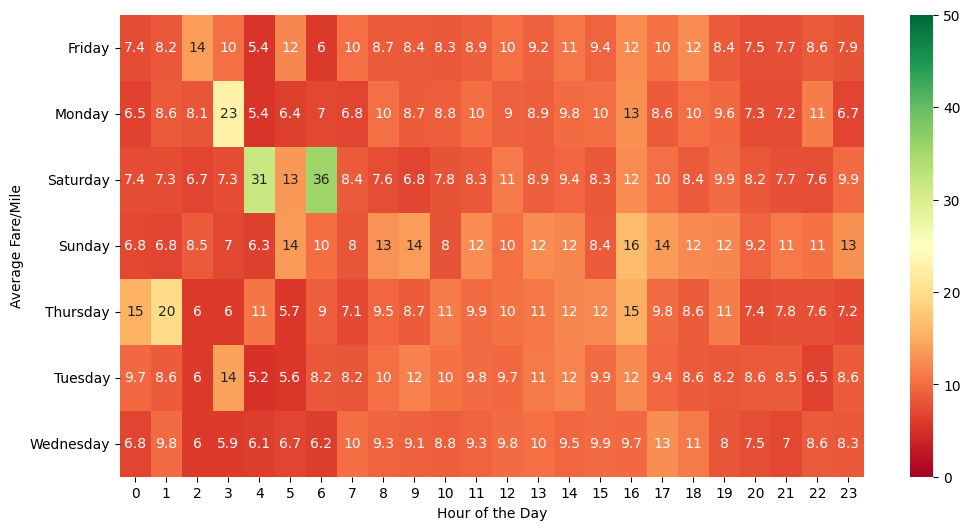

In [152]:
plt.figure(figsize=(12, 6))
sns.heatmap(avgfare_day_hour,cmap='RdYlGn',annot=True,vmin=0, vmax=50)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare/Mile')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

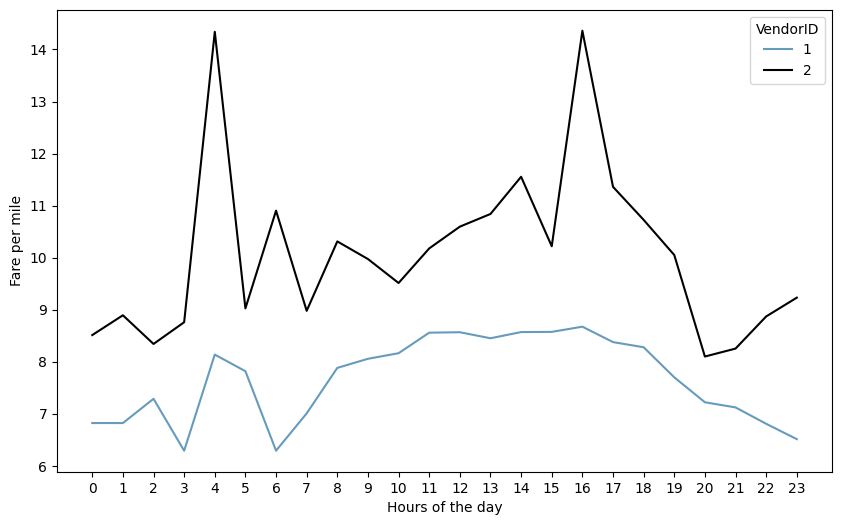

In [154]:
# Compare fare per mile for different vendors
plt.figure(figsize=(10,6))
vendor_fare_per_mile= pd.DataFrame(valid_data.groupby(['VendorID',valid_data.tpep_pickup_datetime.dt.hour])['fare_per_mile'].mean().reset_index())
sns.lineplot(data=vendor_fare_per_mile, x= 'tpep_pickup_datetime' , y ='fare_per_mile', hue= 'VendorID',palette = ['#669bbc','#000000'] )
plt.xlabel('Hours of the day')
plt.ylabel('Fare per mile')
plt.xticks(range(24))
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [155]:
# Defining distance tiers
valid_data.reset_index(drop=True, inplace=True)

for i in range(len(valid_data)):
    if valid_data.loc[i, 'trip_distance'] <= 2:
        valid_data.loc[i, 'distance_category'] = 'Upto 2 miles'
    elif (valid_data.loc[i, 'trip_distance'] > 2) & (valid_data.loc[i, 'trip_distance'] <= 5):
        valid_data.loc[i, 'distance_category'] = '2 to 5 miles'
    else:
        valid_data.loc[i, 'distance_category'] = 'More than 5 miles'

In [156]:
avg_distance_category = valid_data.groupby(['VendorID','distance_category'])[['total_amount','trip_distance']].sum()
avg_distance_category['AvgFare']= avg_distance_category['total_amount']/avg_distance_category['trip_distance']
avg_distance_category

total_amount  trip_distance    AvgFare
VendorID distance_category                                        
1        2 to 5 miles         1064137.09      115008.00   9.252722
         More than 5 miles    1399096.77      229812.70   6.087987
         Upto 2 miles         1421725.32       95155.20  14.941121
2        2 to 5 miles         3555919.48      375702.74   9.464715
         More than 5 miles    5356475.47      884350.53   6.056960
         Upto 2 miles         4161819.00      273571.69  15.212901

In [157]:
avg_distance_category.head()

total_amount  trip_distance    AvgFare
VendorID distance_category                                        
1        2 to 5 miles         1064137.09      115008.00   9.252722
         More than 5 miles    1399096.77      229812.70   6.087987
         Upto 2 miles         1421725.32       95155.20  14.941121
2        2 to 5 miles         3555919.48      375702.74   9.464715
         More than 5 miles    5356475.47      884350.53   6.056960

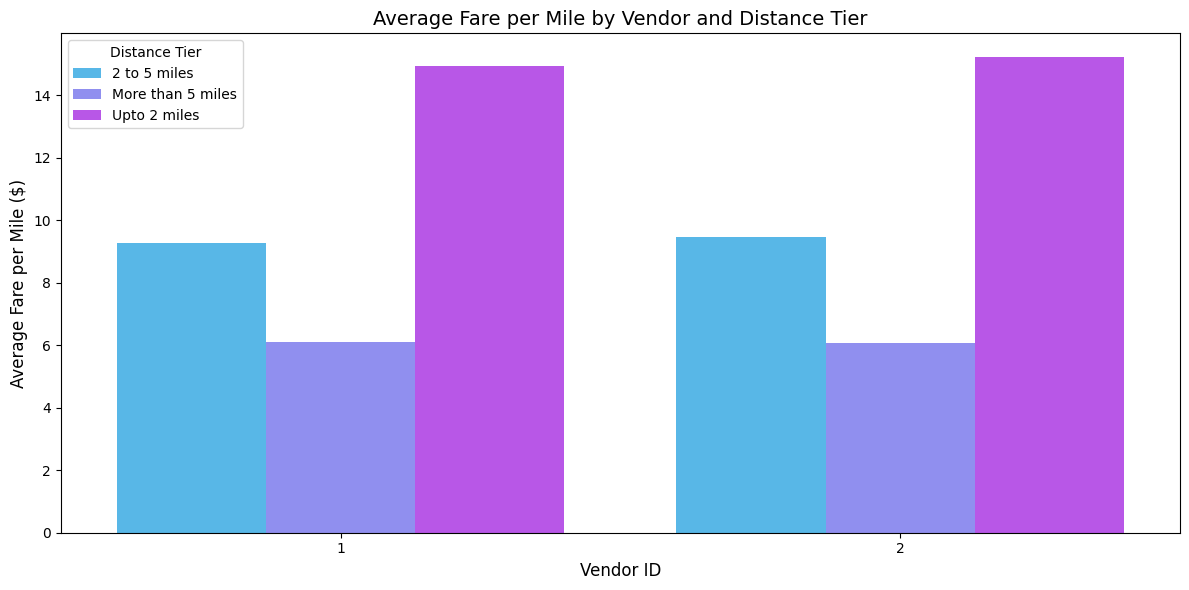

In [159]:
# Ensure the index is reset (if not already)
avg_distance_category.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_distance_category,
    x='VendorID',
    y='AvgFare',
    hue='distance_category',
    palette='cool'
)
plt.title('Average Fare per Mile by Vendor and Distance Tier', fontsize=14)
plt.xlabel('Vendor ID', fontsize=12)
plt.ylabel('Average Fare per Mile ($)', fontsize=12)
plt.legend(title='Distance Tier')
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [160]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
valid_data['tip_percentages']= round(valid_data['tip_amount']/valid_data['total_amount'],4)*100
valid_data.groupby('distance_category')['tip_percentages'].mean()

distance_category
2 to 5 miles         15.127461
More than 5 miles    15.037353
Upto 2 miles         15.603016
Name: tip_percentages, dtype: float64

In [181]:
# Group and calculate average tip %
tip_table = valid_data.groupby(['distance_category', 'passenger_count'])['tip_percentages'].mean().reset_index()

pivot_tip_table = tip_table.pivot(index='distance_category', columns='passenger_count', values='tip_percentages')

pivot_tip_table = pivot_tip_table.round(2)

print(pivot_tip_table)


passenger_count      1.0    2.0    3.0    4.0    5.0    6.0    8.0    9.0
distance_category                                                        
2 to 5 miles       15.09  15.23  15.29  15.51  15.13  15.39    NaN    NaN
More than 5 miles  15.04  14.99  15.05  15.01  15.25  15.32   8.77  14.55
Upto 2 miles       15.59  15.65  15.65  15.72  15.69  15.62  16.67  16.67


In [164]:
#let's categorise hour of day - morning = 5 to 12 , afternoon 12-6, evening 18-24 , night- 00-5
valid_data['hour']= valid_data['tpep_pickup_datetime'].dt.hour

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

valid_data['time_of_day'] = valid_data['hour'].apply(time_of_day)

In [179]:
tip_passenger =pd.DataFrame(valid_data.groupby(['passenger_count','time_of_day'])['tip_percentages'].mean().reset_index())

# Group and calculate average tip percentage
table = tip_passenger.groupby(['passenger_count', 'time_of_day'])['tip_percentages'].mean().reset_index()

# Pivot for better readability
pivot_table = table.pivot(index='passenger_count', columns='time_of_day', values='tip_percentages')

# Optional: round values
pivot_table = pivot_table.round(2)

# Display the table
print(pivot_table)




time_of_day      Afternoon  Evening  Morning  Night
passenger_count                                    
1.0                  15.47    15.26    15.38  15.18
2.0                  15.49    15.33    15.56  14.98
3.0                  15.50    15.32    15.67  15.15
4.0                  15.63    15.49    15.50  15.20
5.0                  15.69    15.37    15.25  15.45
6.0                  15.53    15.61    15.37  15.41
8.0                   8.77    16.67      NaN    NaN
9.0                  14.55    16.67      NaN    NaN


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [166]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_trips = valid_data[valid_data['tip_percentages'] < 10]
high_tip_trips = valid_data[valid_data['tip_percentages'] > 25]

comparison = pd.DataFrame({
    'Low Tip (<10%)': low_tip_trips[['fare_amount', 'trip_distance', 'trip_duration']].mean(),
    'High Tip (>25%)': high_tip_trips[['fare_amount', 'trip_distance', 'trip_duration']].mean()
})

comparison

Low Tip (<10%)  High Tip (>25%)
fare_amount         20.386767        14.328583
trip_distance        3.623312         2.323843
trip_duration     1075.441408       833.053626

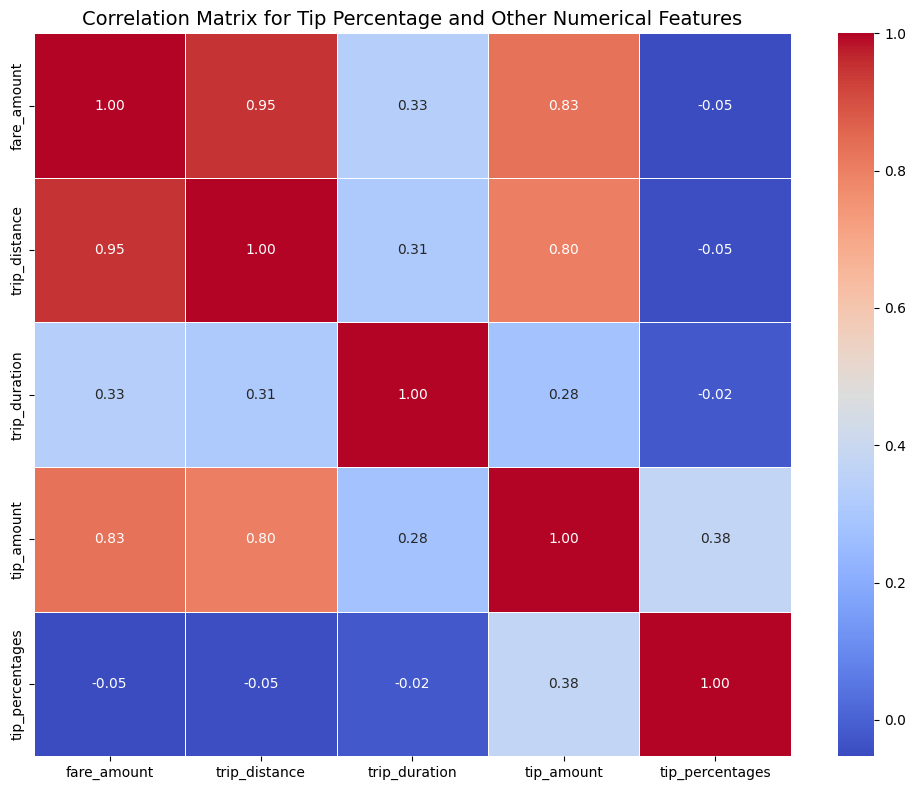

In [167]:
corr_cols = ['fare_amount', 'trip_distance', 'trip_duration',
             'tip_amount', 'tip_percentages' ]

# Filter data with non-null tip_percentage
corr_df = valid_data[corr_cols].dropna()

# Compute correlation matrix
correlation_matrix = corr_df.corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Tip Percentage and Other Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

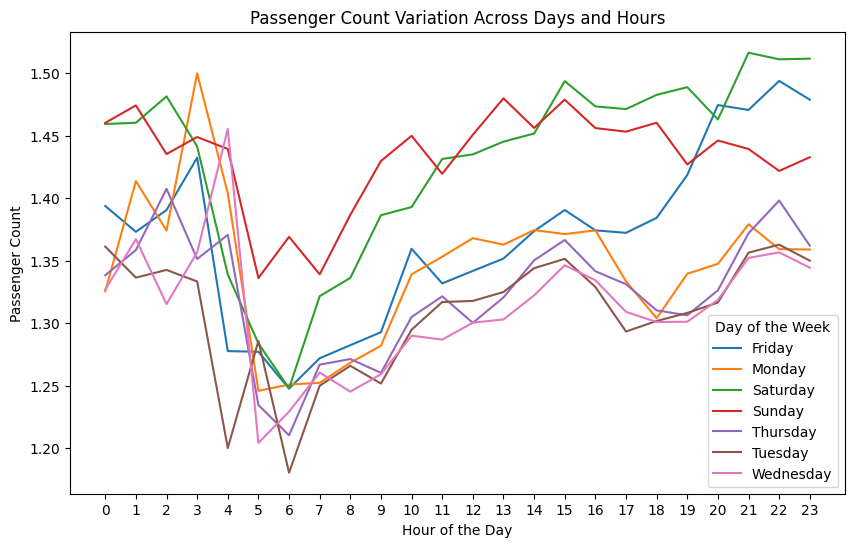

In [168]:
# See how passenger count varies across hours and days
valid_data.groupby([ valid_data['tpep_pickup_datetime'].dt.hour,valid_data['tpep_pickup_datetime'].dt.day_name()])['passenger_count'].mean().unstack().plot(kind='line', figsize=(10, 6))
plt.title('Passenger Count Variation Across Days and Hours')
plt.xticks(valid_data['tpep_pickup_datetime'].dt.hour.unique())
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.legend(title='Day of the Week')
plt.show()


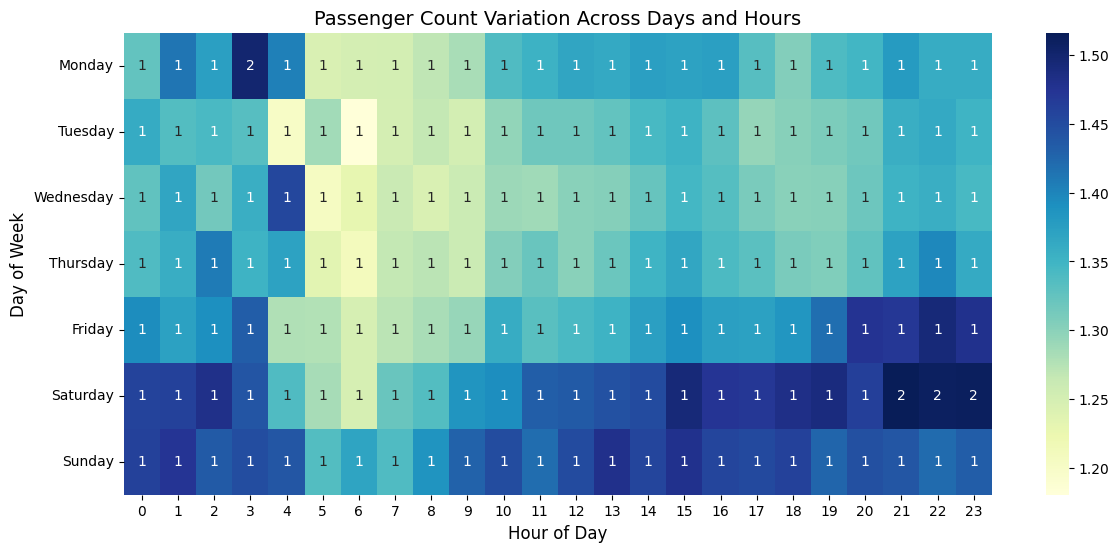

In [169]:
# Alternate view
valid_data['pickup_dayofweek'] = valid_data['tpep_pickup_datetime'].dt.day_name()

# Pivot table: mean passenger count by day and hour
passenger_pivot = valid_data.pivot_table(
    index='pickup_dayofweek',
    columns='pickup_hour',
    values='passenger_count',
    aggfunc='mean'
)

# Ensure correct order and convert to string index
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_pivot = passenger_pivot.reindex(day_order)

# Confirm index is string type
passenger_pivot.index = passenger_pivot.index.astype(str)


# Plotting heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(passenger_pivot, annot=True, fmt=".0f", cmap='YlGnBu')  # fmt=".0f" to show whole numbers
plt.title("Passenger Count Variation Across Days and Hours", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)
plt.xticks(ticks=np.arange(len(passenger_pivot.columns)) + 0.5, labels=passenger_pivot.columns, rotation=0)
plt.yticks(ticks=np.arange(len(passenger_pivot.index)) + 0.5, labels=passenger_pivot.index, rotation=0)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

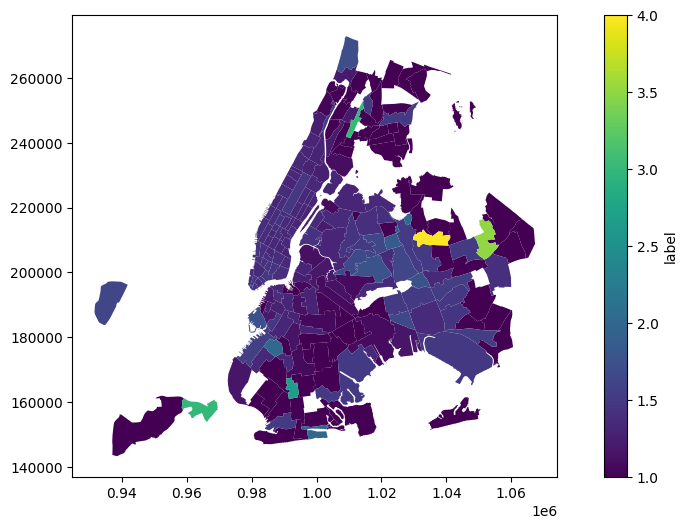

In [170]:
# How does passenger count vary across zones
zone_passenger_count=pd.DataFrame(combined_data.groupby('zone')['passenger_count'].mean().reset_index())
zone2 = pd.merge(zones,zone_passenger_count,left_on='zone',right_on ='zone')

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
zone2.sort_values(by='passenger_count').plot(column = 'passenger_count',ax=ax,legend=True,legend_kwds ={'label': "label", 'orientation': "vertical"} )
plt.show()


In [171]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# 1. Group by zone and calculate average passenger count
avg_passenger_count = combined_data.groupby('zone')['passenger_count'].mean().reset_index()
avg_passenger_count.columns = ['zone', 'avg_passenger_count']

# 2. Merge with zones GeoDataFrame
zones_with_trips = zones.merge(avg_passenger_count, on='zone', how='left')

# 3. Fill NaNs with 0 if any zones have no trips
zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)
zones_with_trips

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           4    0.043567    0.000112            Alphabet City           4   
2           6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
3           7    0.107417    0.000390                  Astoria           7   
4           9    0.099784    0.000338               Auburndale           9   
..        ...         ...         ...                      ...         ...   
208       258    0.089013    0.000366                Woodhaven         258   
209       260    0.133514    0.000422                 Woodside         260   
210       261    0.027120    0.000034       World Trade Center         261   
211       262    0.049064    0.000122           Yorkville East         262   
212       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  count  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...     16   
1        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...    650   
2    Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...      1   
3           Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...    139   
4           Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...      3   
..             ...                                                ...    ...   
208         Queens  POLYGON ((1027223.758 190451.926, 1027233.961 ...      2   
209         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...     43   
210      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   2808   
211      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   7994   
212      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  11316   

     avg_passenger_count  
0               1.625000  
1               1.350769  
2               3.000000  
3               1.352518  
4               1.000000  
..                   ...  
208             1.500000  
209             1.465116  
210             1.488604  
211             1.315862  
212             1.331301  

[213 rows x 9 columns]

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [172]:
# How often is each surcharge applied?
# Create hour and day features
valid_data['pickup_hour'] = valid_data['tpep_pickup_datetime'].dt.hour
valid_data['pickup_day'] = valid_data['tpep_pickup_datetime'].dt.day_name()

# Filter where extra charge > 0
with_extra = valid_data[(valid_data['extra'] > 0) | (valid_data['improvement_surcharge']!=0) | (valid_data['congestion_surcharge']!=0)]

# 1. Frequency of extra charges by hour
extra_by_hour = with_extra['pickup_hour'].value_counts().sort_index()

# 2. Frequency of extra charges by day
extra_by_day = with_extra['pickup_day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

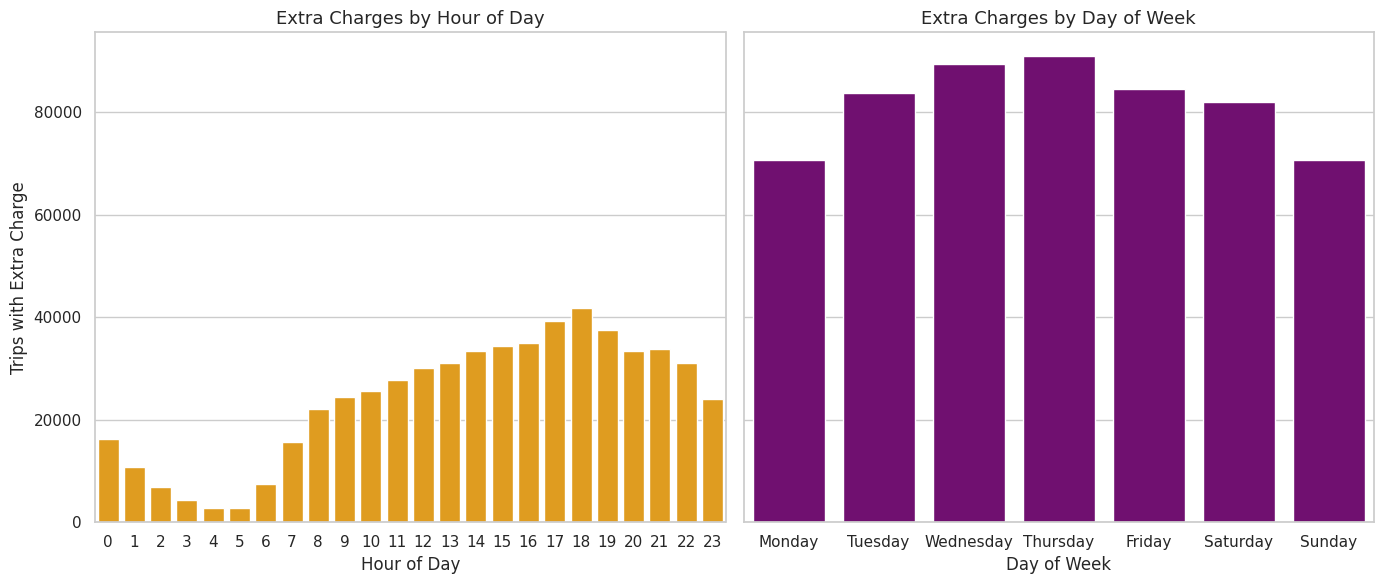

In [184]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(
    x=extra_by_hour.index,
    y=extra_by_hour.values,
    ax=axes[0],
    color='orange'
)
axes[0].set_title("Extra Charges by Hour of Day", fontsize=13)
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Trips with Extra Charge")

sns.barplot(
    x=extra_by_day.index,
    y=extra_by_day.values,
    ax=axes[1],
    color='purple'
)
axes[1].set_title("Extra Charges by Day of Week", fontsize=13)
axes[1].set_xlabel("Day of Week")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


In [174]:
# Group by pickup zones
pickup_zone_extra = valid_data[valid_data['extra'] > 0].groupby('PULocationID').size().reset_index(name='extra_count')

# Merge with zone names
pickup_zone_extra = pd.merge(pickup_zone_extra, zones, left_on='PULocationID', right_on='LocationID')

# Top 10 pickup zones with most extra charges
top_extra_pickup = pickup_zone_extra.sort_values(by='extra_count', ascending=False).head(10)

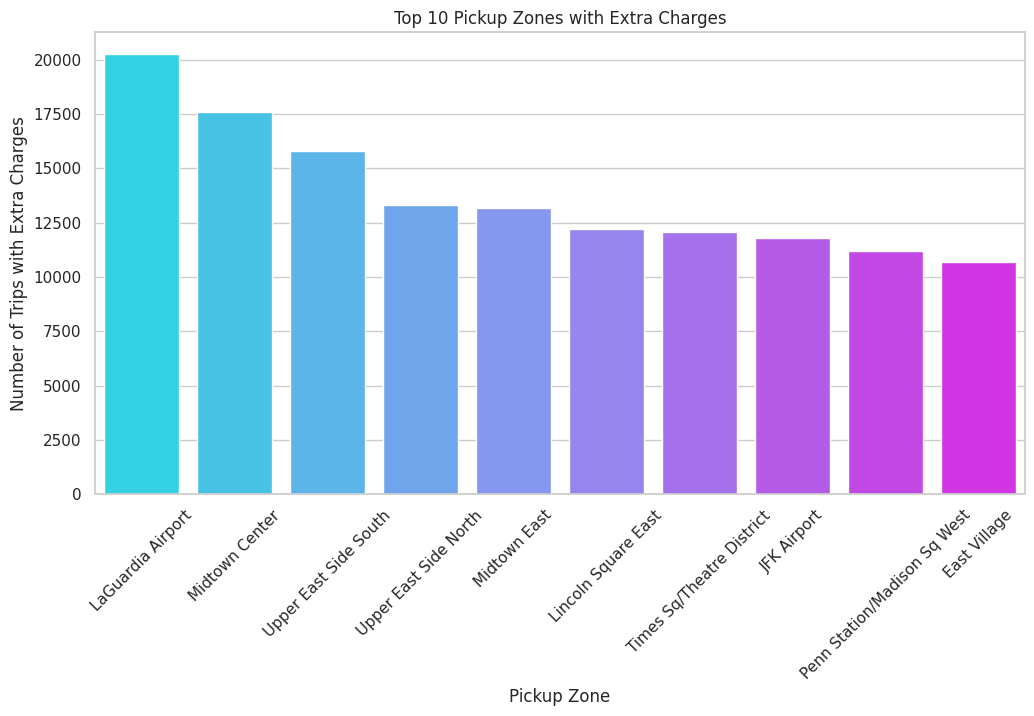

In [182]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_extra_pickup, x='zone', y='extra_count',hue='zone', palette='cool')
plt.title("Top 10 Pickup Zones with Extra Charges")
plt.xlabel("Pickup Zone")
plt.ylabel("Number of Trips with Extra Charges")
plt.xticks(rotation=45)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

#High Pickup-to-Dropoff Ratio Zones
* Zones like East Elmhurst (13.3), JFK (4.25), and LaGuardia (2.63) exhibit significantly more pickups than drop-offs. These are spots where a lot of people need rides, but not many end their trips there. Since drivers often go there to pick people up, it would help if more passengers were dropped off in these areas too. This way, drivers don’t have to wait around or drive empty to find their next ride. We can fix this by offering drivers small rewards or guiding more drop-offs to these locations..

* Other busy spots like Penn Station, Central Park, Midtown, and Greenwich Village also get a lot more pickups than drop-offs. That means during busy times—like mornings and evenings—we need to make sure enough drivers are nearby to keep up with the demand.

#Low Pickup-to-Dropoff Ratio Zones
* Some areas like Midwood (0.01), Newark Airport (0.01), and Bay Ridge (0.02) have very few pickups compared to drop-offs. This means people are usually ending their rides there but not booking new ones from those spots. As a result, drivers often leave these areas without passengers, wasting time and fuel.

* To fix this imbalance, ride platforms can lower the fees for trips starting in areas like Saint Albans, Kew Gardens Hills, and Bensonhurst West. This can encourage more people to book rides from these zones and help drivers get more trips.

* In the mornings, when demand is high, especially during rush hours, it makes sense to send more taxis to busy spots like airport zones, Central Park, or Times Square. This ensures enough drivers are available where they’re needed most.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

* Busy areas like JFK, LaGuardia, Midtown, Times Square, and Central Park see a lot of pickups, especially during morning and evening rush hours. These spots should be the main focus for sending cabs every day of the week.

* Ride demand goes up a lot in the evening (5–9 PM), especially in business and entertainment areas. Having more taxis available during these hours can help reduce passenger wait times and improve service.

* Airports like JFK and LaGuardia don’t just get a lot of rides—they also bring in longer trips that pay more. These are great spots to set up taxi stands or flexible pickup zones to help drivers and passengers connect more easily.

* On weekends, more people request rides from fun spots like Central Park, West Village, and Times Square. On weekdays, demand shifts to office areas and transit hubs. Moving taxis around based on these patterns can make things run more smoothly.

* Areas like Bay Ridge and Midwood often have more drop-offs than pickups, which means drivers may leave empty. To avoid this, platforms can offer bonuses or lower fees to drivers who accept rides starting from these zones. This helps balance ride availability across the ci

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Add Extra Charges for Long Winter Trips
To boost earnings during the winter months, introduce a higher per-mile rate (around $1–$1.5 more) for longer trips. This extra charge would only apply after a certain distance—like after the first 5 or 10 miles—so shorter trips stay affordable.

2. Raise Fares During Busy Hours
Fare increases of up to 25% are recommended during peak hours on weekdays (7–10 AM and 5–9 PM) and weekends. These times consistently have higher demand, especially in busy areas like Midtown, Central Park, and JFK Airport.

3. Adjust Friday Evening Pricing
Even though Friday evenings (5–9 PM) see a lot of rides, the fare per mile is lower than expected. A small fare increase—around 10%—during this time can help improve revenue without discouraging riders.

4. Make the Most of Late-Night Demand
Between 2–6 AM on weekends, fares per mile are higher, especially in areas with nightlife or near airports. Deploying more taxis to these hotspots during these hours can help capture more profitable, longer trips.

5. Improve Vendor Earnings with Better Zone Focus
Vendor 1 currently earns less per mile compared to Vendor 2. To close this gap, Vendor 1 should be assigned to high-demand zones like Midtown Center, LaGuardia, and JFK, where pricing and trip volume are stronger.

6. Boost Demand During Slow Periods
During times with low ride activity—like late nights during the week—fare per mile drops due to low demand. Offering promotions or discounts for long trips during these slow periods can attract more riders and help slowly raise prices over time.


